In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import missingno as msno

In [2]:
folder_path="./datasets/cicids-2017-dataset/*.csv"

csv_files=glob.glob(folder_path)

dfs=[pd.read_csv(csv_file) for csv_file in csv_files]

In [3]:
print("Data dimensions: ")
for i, d in enumerate(dfs, start=1):
  rows,cols=d.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 529918 rows, 79 columns
Data2 -> 288602 rows, 79 columns
Data3 -> 692703 rows, 79 columns
Data4 -> 445909 rows, 79 columns
Data5 -> 225745 rows, 79 columns
Data6 -> 170366 rows, 79 columns
Data7 -> 191033 rows, 79 columns
Data8 -> 286467 rows, 79 columns


In [4]:
df=pd.concat(dfs, ignore_index=True)
rows,cols=df.shape

print("New dimensions: ")
print("No of rows: %i\nNo of columns: %i\nTotal Cells: %i"%(rows,cols,rows*cols))

New dimensions: 
No of rows: 2830743
No of columns: 80
Total Cells: 226459440


In [5]:
for d in dfs: del d

In [6]:
col_names={col: col.strip() for col in df.columns}
df.rename(columns=col_names, inplace=True)

In [7]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 80 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             float64
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [ ]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
df.describe().transpose()

Overview of Columns:


In [66]:
pd.options.display.max_columns = 80
df

Destination Port  Flow Duration  Total Fwd Packets  \
0                 49188.0              4                  2   
1                 49188.0              1                  2   
2                 49188.0              1                  2   
3                 49188.0              1                  2   
4                 49486.0              3                  2   
...                   ...            ...                ...   
2830738             443.0         196135                 49   
2830739             443.0         378424                 49   
2830740             443.0         161800                 70   
2830741             443.0         142864                 50   
2830742             443.0         186928                 46   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             0                           12   
1                             0                           12   
2                             0                           12   
3                             0                           12   
4                             0                           12   
...                         ...                          ...   
2830738                      57                         1331   
2830739                      59                         1325   
2830740                     103                         1427   
2830741                      62                         1331   
2830742                      57                         1319   

         Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                  0                      6   
1                                  0                      6   
2                                  0                      6   
3                                  0                      6   
4                                  0                      6   
...                              ...                    ...   
2830738                       105841                    570   
2830739                       104393                    570   
2830740                       215903                    570   
2830741                       110185                    570   
2830742                       100049                    570   

         Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                            6                6.000000               0.000000   
1                            6                6.000000               0.000000   
2                            6                6.000000               0.000000   
3                            6                6.000000               0.000000   
4                            6                6.000000               0.000000   
...                        ...                     ...                    ...   
2830738                      0               27.163265             108.067176   
2830739                      0               27.040816             108.095051   
2830740                      0               20.385714              90.746389   
2830741                      0               26.620000             107.027727   
2830742                      0               28.673913             111.438085   

         Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
0                            0                      0                0.000000   
1                            0                      0                0.000000   
2                            0                      0                0.000000   
3                            0                      0                0.000000   
4                            0                      0                0.000000   
...                        ...                    ...                     ...   
2830738                   4344                      0             1856.859649   
2830739                   2896                      0             1769.372881   
2830740                 

## Data Cleaning

In [67]:
dups = df[df.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 303036


In [68]:
df.drop_duplicates(inplace = True)
df.shape

(2527707, 80)

In [69]:
df = df.loc[:, ~df.columns.duplicated()]


missing_val = df.isna().sum()
print(missing_val.loc[missing_val > 0])

Destination Port    223112
Flow Bytes/s           354
dtype: int64


In [70]:
# Checking for infinity values
numeric_cols = df.select_dtypes(include = np.number).columns
inf_count = np.isinf(df[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1214
Flow Packets/s    1568
dtype: int64


In [71]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {df.isna().sum().sum()}')

df.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {df.isna().sum().sum()}')

Initial missing values: 223466


/tmp/ipykernel_100727/2112682762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace = True)


Missing values after processing infinite values: 226248


In [72]:
missing = df.isna().sum()
print(missing.loc[missing > 0])

Destination Port    223112
Flow Bytes/s          1568
Flow Packets/s        1568
dtype: int64


In [73]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(df)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                  Missing Values  Percentage of Total Values
Destination Port          223112                        8.83
Flow Bytes/s                1568                        0.06
Flow Packets/s              1568                        0.06


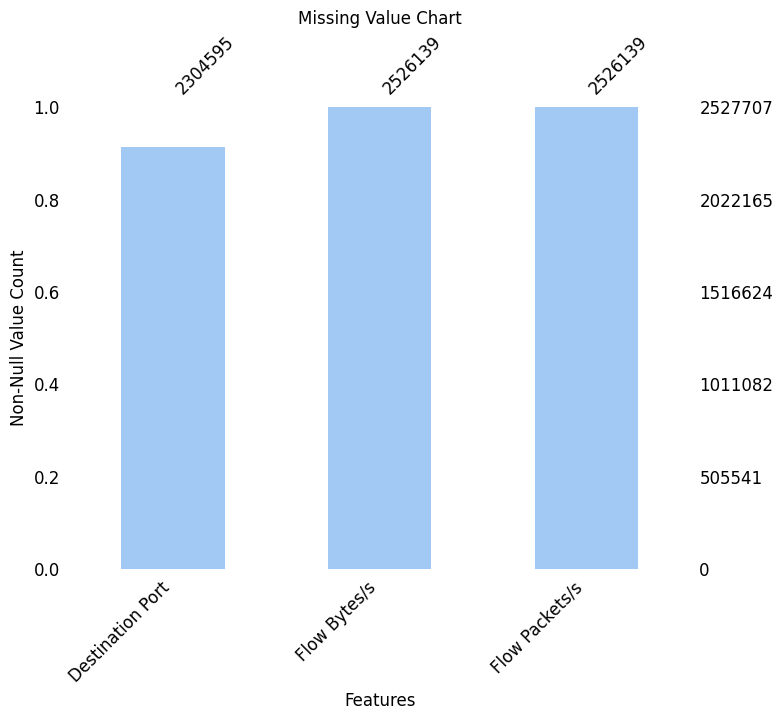

In [74]:
sns.set_palette('pastel')
missing_vals = df.columns[df.isna().any()].tolist()
fig, ax = plt.subplots(figsize=(8, 6))  # Adjusted width for better visibility
msno.bar(df[missing_vals], ax=ax, fontsize=12, color=sns.color_palette("pastel")[0])
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Non-Null Value Count', fontsize=12)
ax.set_title('Missing Value Chart', fontsize=12)
plt.show()

### Dealing with missing values (cols with missing data)

In [77]:
# to deal with missing values in destination port column, we will just drop the rows that don't have the destination port
df.dropna(subset=['Destination Port'], inplace=True)

/tmp/ipykernel_100727/1279172444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Destination Port'], inplace=True)


In [78]:
# recheck missing values

missing_val = df.isna().sum()
print(missing_val[missing_val>0])

Flow Bytes/s      1538
Flow Packets/s    1538
dtype: int64


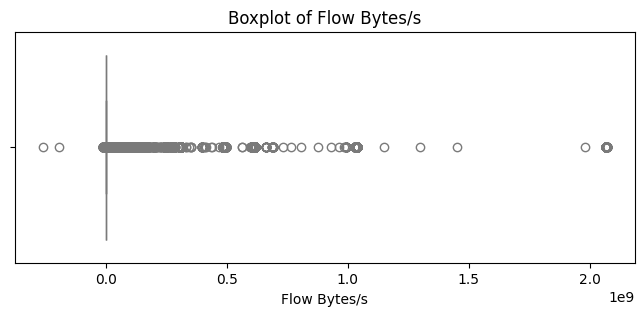

In [79]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = df['Flow Bytes/s'])
plt.title('Boxplot of Flow Bytes/s')
plt.show()

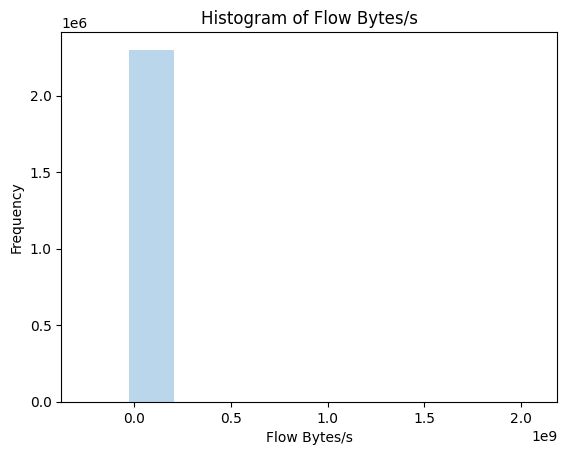

In [80]:
colors = sns.color_palette('Blues')
plt.hist(df['Flow Bytes/s'], color = colors[1])
plt.title('Histogram of Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.show()

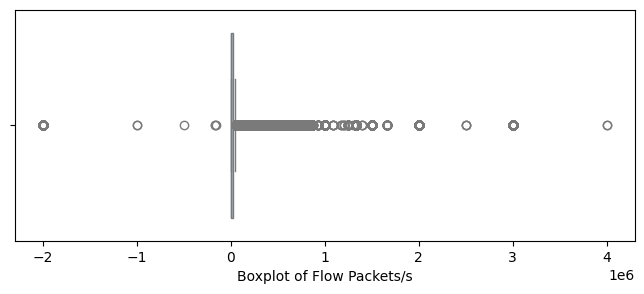

In [81]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = df['Flow Packets/s'])
plt.xlabel('Boxplot of Flow Packets/s')
plt.show()

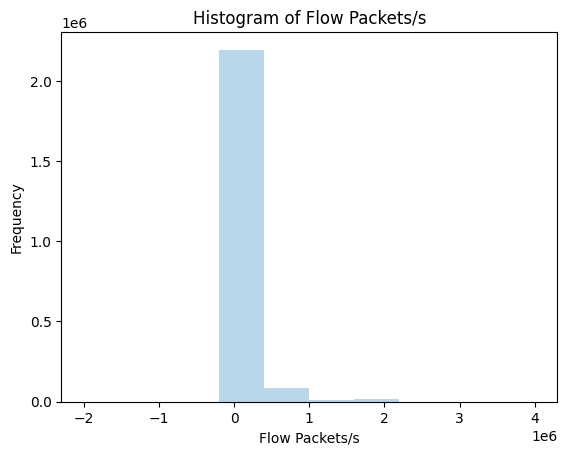

In [82]:
colors = sns.color_palette('Blues')
plt.hist(df['Flow Packets/s'], color = colors[1])
plt.title('Histogram of Flow Packets/s')
plt.xlabel('Flow Packets/s')
plt.ylabel('Frequency')
plt.show()

In [83]:
med_flow_bytes = df['Flow Bytes/s'].median()
med_flow_packets = df['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  3882.287332
Median of Flow Packets/s:  83.83810861


In [84]:
# replace missing values in the columns with the median values

df.fillna({'Flow Bytes/s': med_flow_bytes, 'Flow Packets/s': med_flow_packets}, inplace=True)

/tmp/ipykernel_100727/1647129967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({'Flow Bytes/s': med_flow_bytes, 'Flow Packets/s': med_flow_packets}, inplace=True)


In [85]:
print('Number of \'Flow Bytes/s\' missing values:', df['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', df['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


### 2.3 Analysing Patterns using Visualisations

In [86]:
df['Label'].unique()

array(['BENIGN', 'Infiltration', 'DoS slowloris', 'DoS Slowhttptest',
       'DoS Hulk', 'DoS GoldenEye', 'Heartbleed', 'FTP-Patator',
       'SSH-Patator', 'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Bot', 'PortScan'], dtype=object)

In [87]:
# Types of attacks & normal instances (BENIGN)
df['Label'].value_counts()

Label
BENIGN                        2006733
DoS Hulk                       172849
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [88]:
# Creating a dictionary that maps each label to its attack type
attack_map={
  "BENIGN":"BENIGN",
"DoS Hulk":"DoS",
"PortScan":"Port Scan",
"DoS GoldenEye":"Dos",
"FTP-Patator":"Brute Force",
"DoS slowloris":"DoS",
"DoS Slowhttptest":"DoS",
"SSH-Patator":"Brute Force",
"Bot":"Bot",
"Web Attack � Brute Force":"Web Attack",
"Web Attack � XSS":"Web Attack",
"Infiltration":"Web Attack",
"Web Attack � Sql Injection":"Web Attack ",
"Heartbleed":"Heartbleed ",
}

df['Attack Type'] = df['Label'].map(attack_map)

/tmp/ipykernel_100727/2234902981.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attack Type'] = df['Label'].map(attack_map)


In [89]:
df['Attack Type'].value_counts()

Attack Type
BENIGN         2006733
DoS             183462
Port Scan        90819
Dos              10286
Brute Force       9152
Web Attack        2158
Bot               1953
Web Attack          21
Heartbleed          11
Name: count, dtype: int64

In [90]:
df.drop('Label', axis = 1, inplace = True)

/tmp/ipykernel_100727/1686828076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Label', axis = 1, inplace = True)


In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Attack Number'] = le.fit_transform(df['Attack Type'])

print(df['Attack Number'].unique())

[0 7 3 4 5 2 8 1 6]


/tmp/ipykernel_100727/2857888073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attack Number'] = le.fit_transform(df['Attack Type'])


In [92]:
# Printing corresponding attack type for each encoded value
encoded_values = df['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DoS
4: Dos
5: Heartbleed 
6: Port Scan
7: Web Attack
8: Web Attack 


In [93]:
corr = df.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

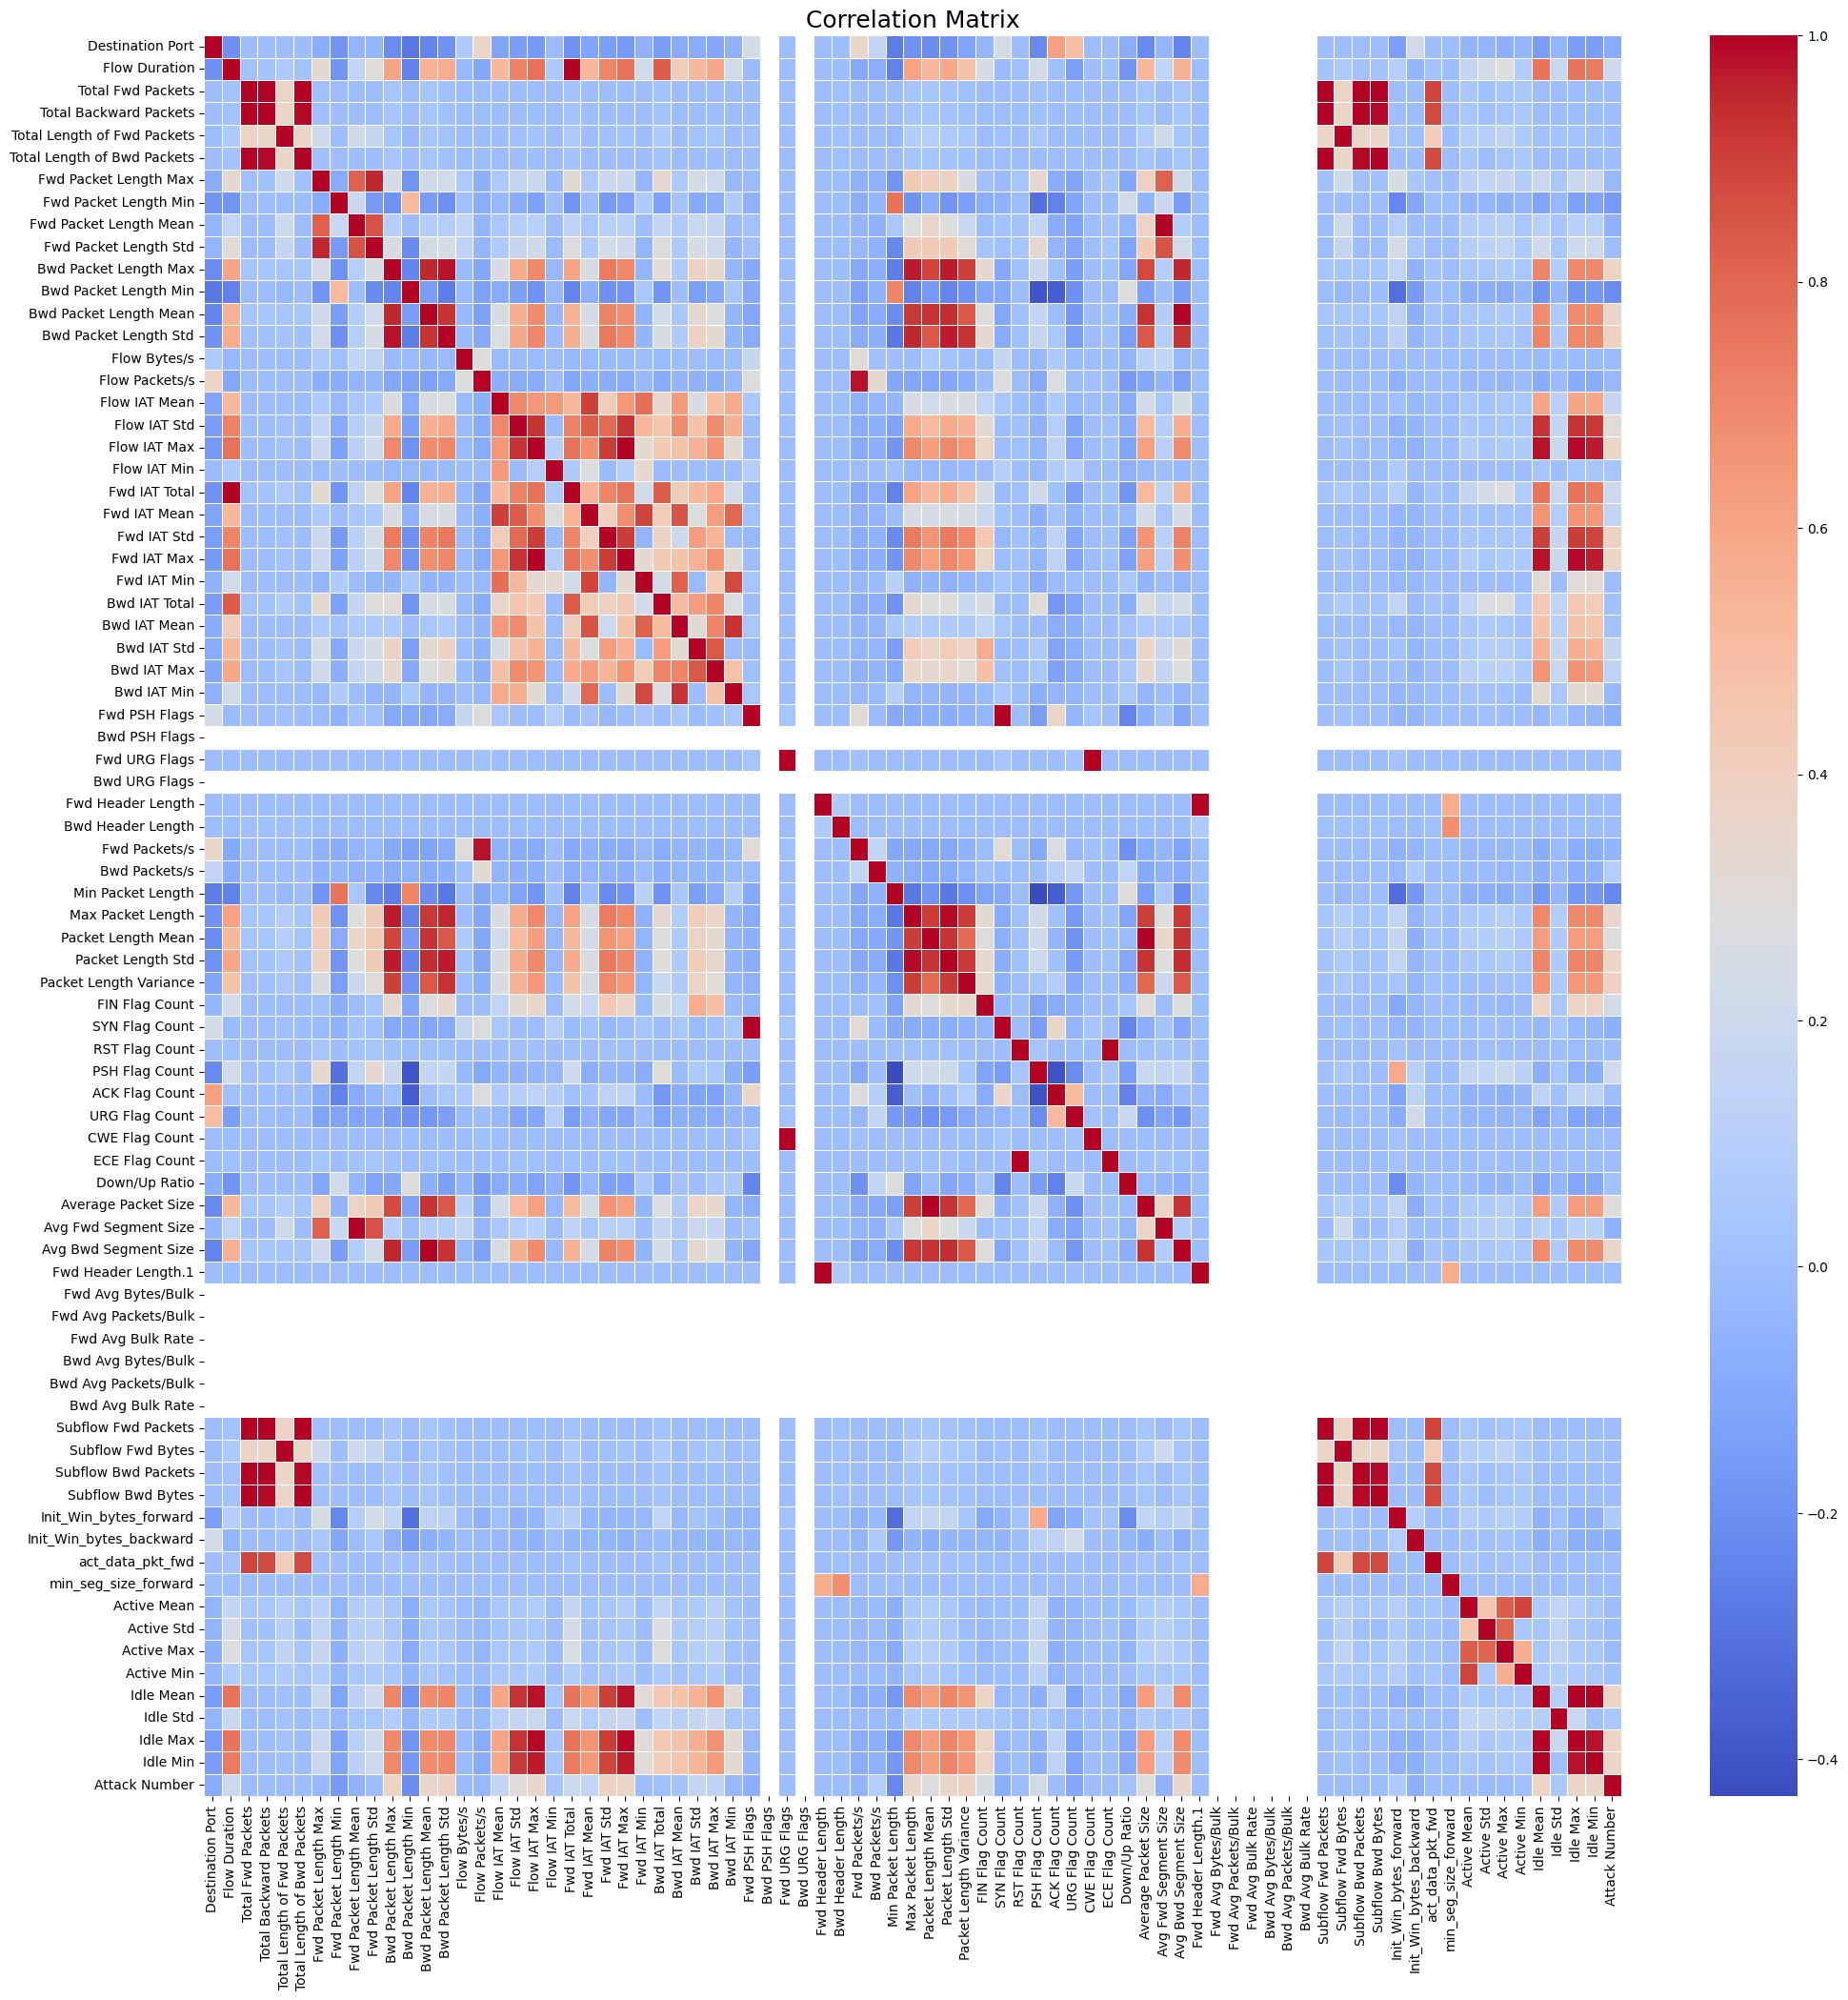

In [94]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [95]:
# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.2
2.  Bwd Packet Length Max    :0.37
3.  Bwd Packet Length Mean   :0.35
4.  Bwd Packet Length Std    :0.39
5.  Flow IAT Mean            :0.16
6.  Flow IAT Std             :0.3
7.  Flow IAT Max             :0.36
8.  Flow IAT Min             :0.03
9.  Fwd IAT Total            :0.2
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.39
12. Fwd IAT Max              :0.36
13. Bwd IAT Total            :0.01
14. Bwd IAT Mean             :0.02
15. Bwd IAT Std              :0.17
16. Bwd IAT Max              :0.13
17. Bwd Packets/s            :0.09
18. Max Packet Length        :0.35
19. Packet Length Mean       :0.29
20. Packet Length Std        :0.36
21. Packet Length Variance   :0.39
22. FIN Flag Count           :0.23
23. PSH Flag Count           :0.22
24. Down/Up Ratio            :0.02
25. Average Packet Size      :0.29
26. Avg Bwd Segment Size     :0.35
27. Init_Win_bytes_forward   :0.07


In [96]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 32


In [97]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = df.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

#### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

In [98]:
# Data sampling for data analysis
sample_size = int(0.2 * len(df)) # 20% of the original size
sampled_data = df.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(460919, 80)

In [99]:
# To assess if a sample is representative of the population and comparison of descriptive statistics (mean)
numeric_cols = df.select_dtypes(include = [np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = df[col].describe()['mean']
    new = sampled_data[col].describe()['mean']
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

Descriptive Statistics Comparison (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
Destination Port                8658.394005           8656.031841           0.03%
Flow Duration                   16557213.851521       16552172.100117       0.03%
Total Fwd Packets               10.777257             9.846984              8.63%
Total Backward Packets          12.215943             10.997436             9.97%
Total Length of Fwd Packets     577.626126            559.606961            3.12%
Total Length of Bwd Packets     19263.150556          16384.769784          14.94%
Fwd Packet Length Max           200.284382            200.053467            0.12%
Fwd Packet Length Min           18.383495             18.425435             0.23%
Fwd Packet Length Mean          53.429228             53.467159             0.07%
Fwd Packet Length Std   

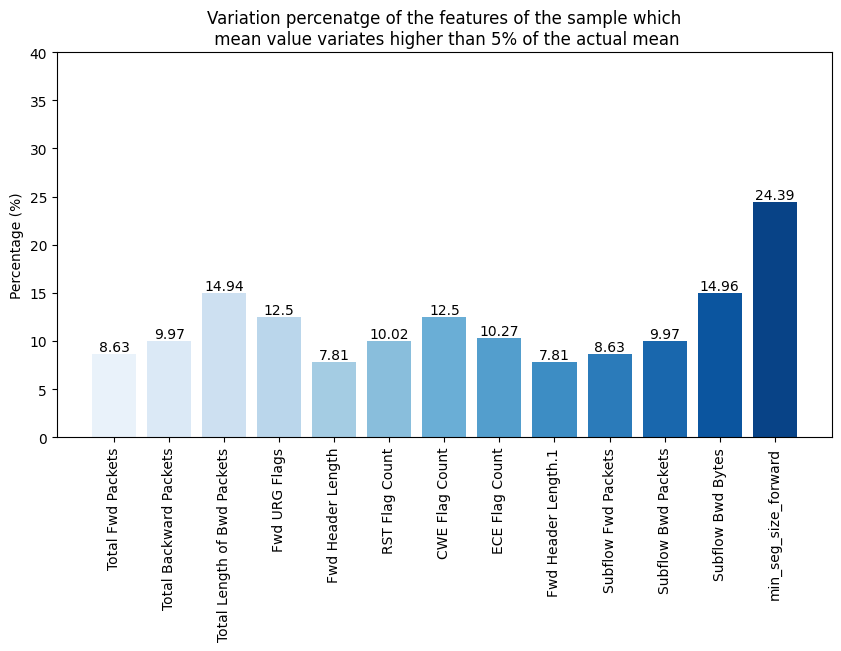

In [100]:
labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Variation percenatge of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [101]:
# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  Destination Port              : 31435
2.  Flow Duration                 : 221876
3.  Total Fwd Packets             : 671
4.  Total Backward Packets        : 845
5.  Total Length of Fwd Packets   : 9027
6.  Total Length of Bwd Packets   : 23611
7.  Fwd Packet Length Max         : 3637
8.  Fwd Packet Length Min         : 232
9.  Fwd Packet Length Mean        : 34334
10. Fwd Packet Length Std         : 64331
11. Bwd Packet Length Max         : 3856
12. Bwd Packet Length Min         : 440
13. Bwd Packet Length Mean        : 44555
14. Bwd Packet Length Std         : 60892
15. Flow Bytes/s                  : 307740
16. Flow Packets/s                : 251473
17. Flow IAT Mean                 : 237491
18. Flow IAT Std                  : 198122
19. Flow IAT Max                  : 143005
20. Flow IAT Min                  : 44847
21. Fwd IAT Total                 : 104875
22. Fwd IAT Mean                  : 145489
23. Fwd IAT Std                   : 129639
24. Fwd IAT

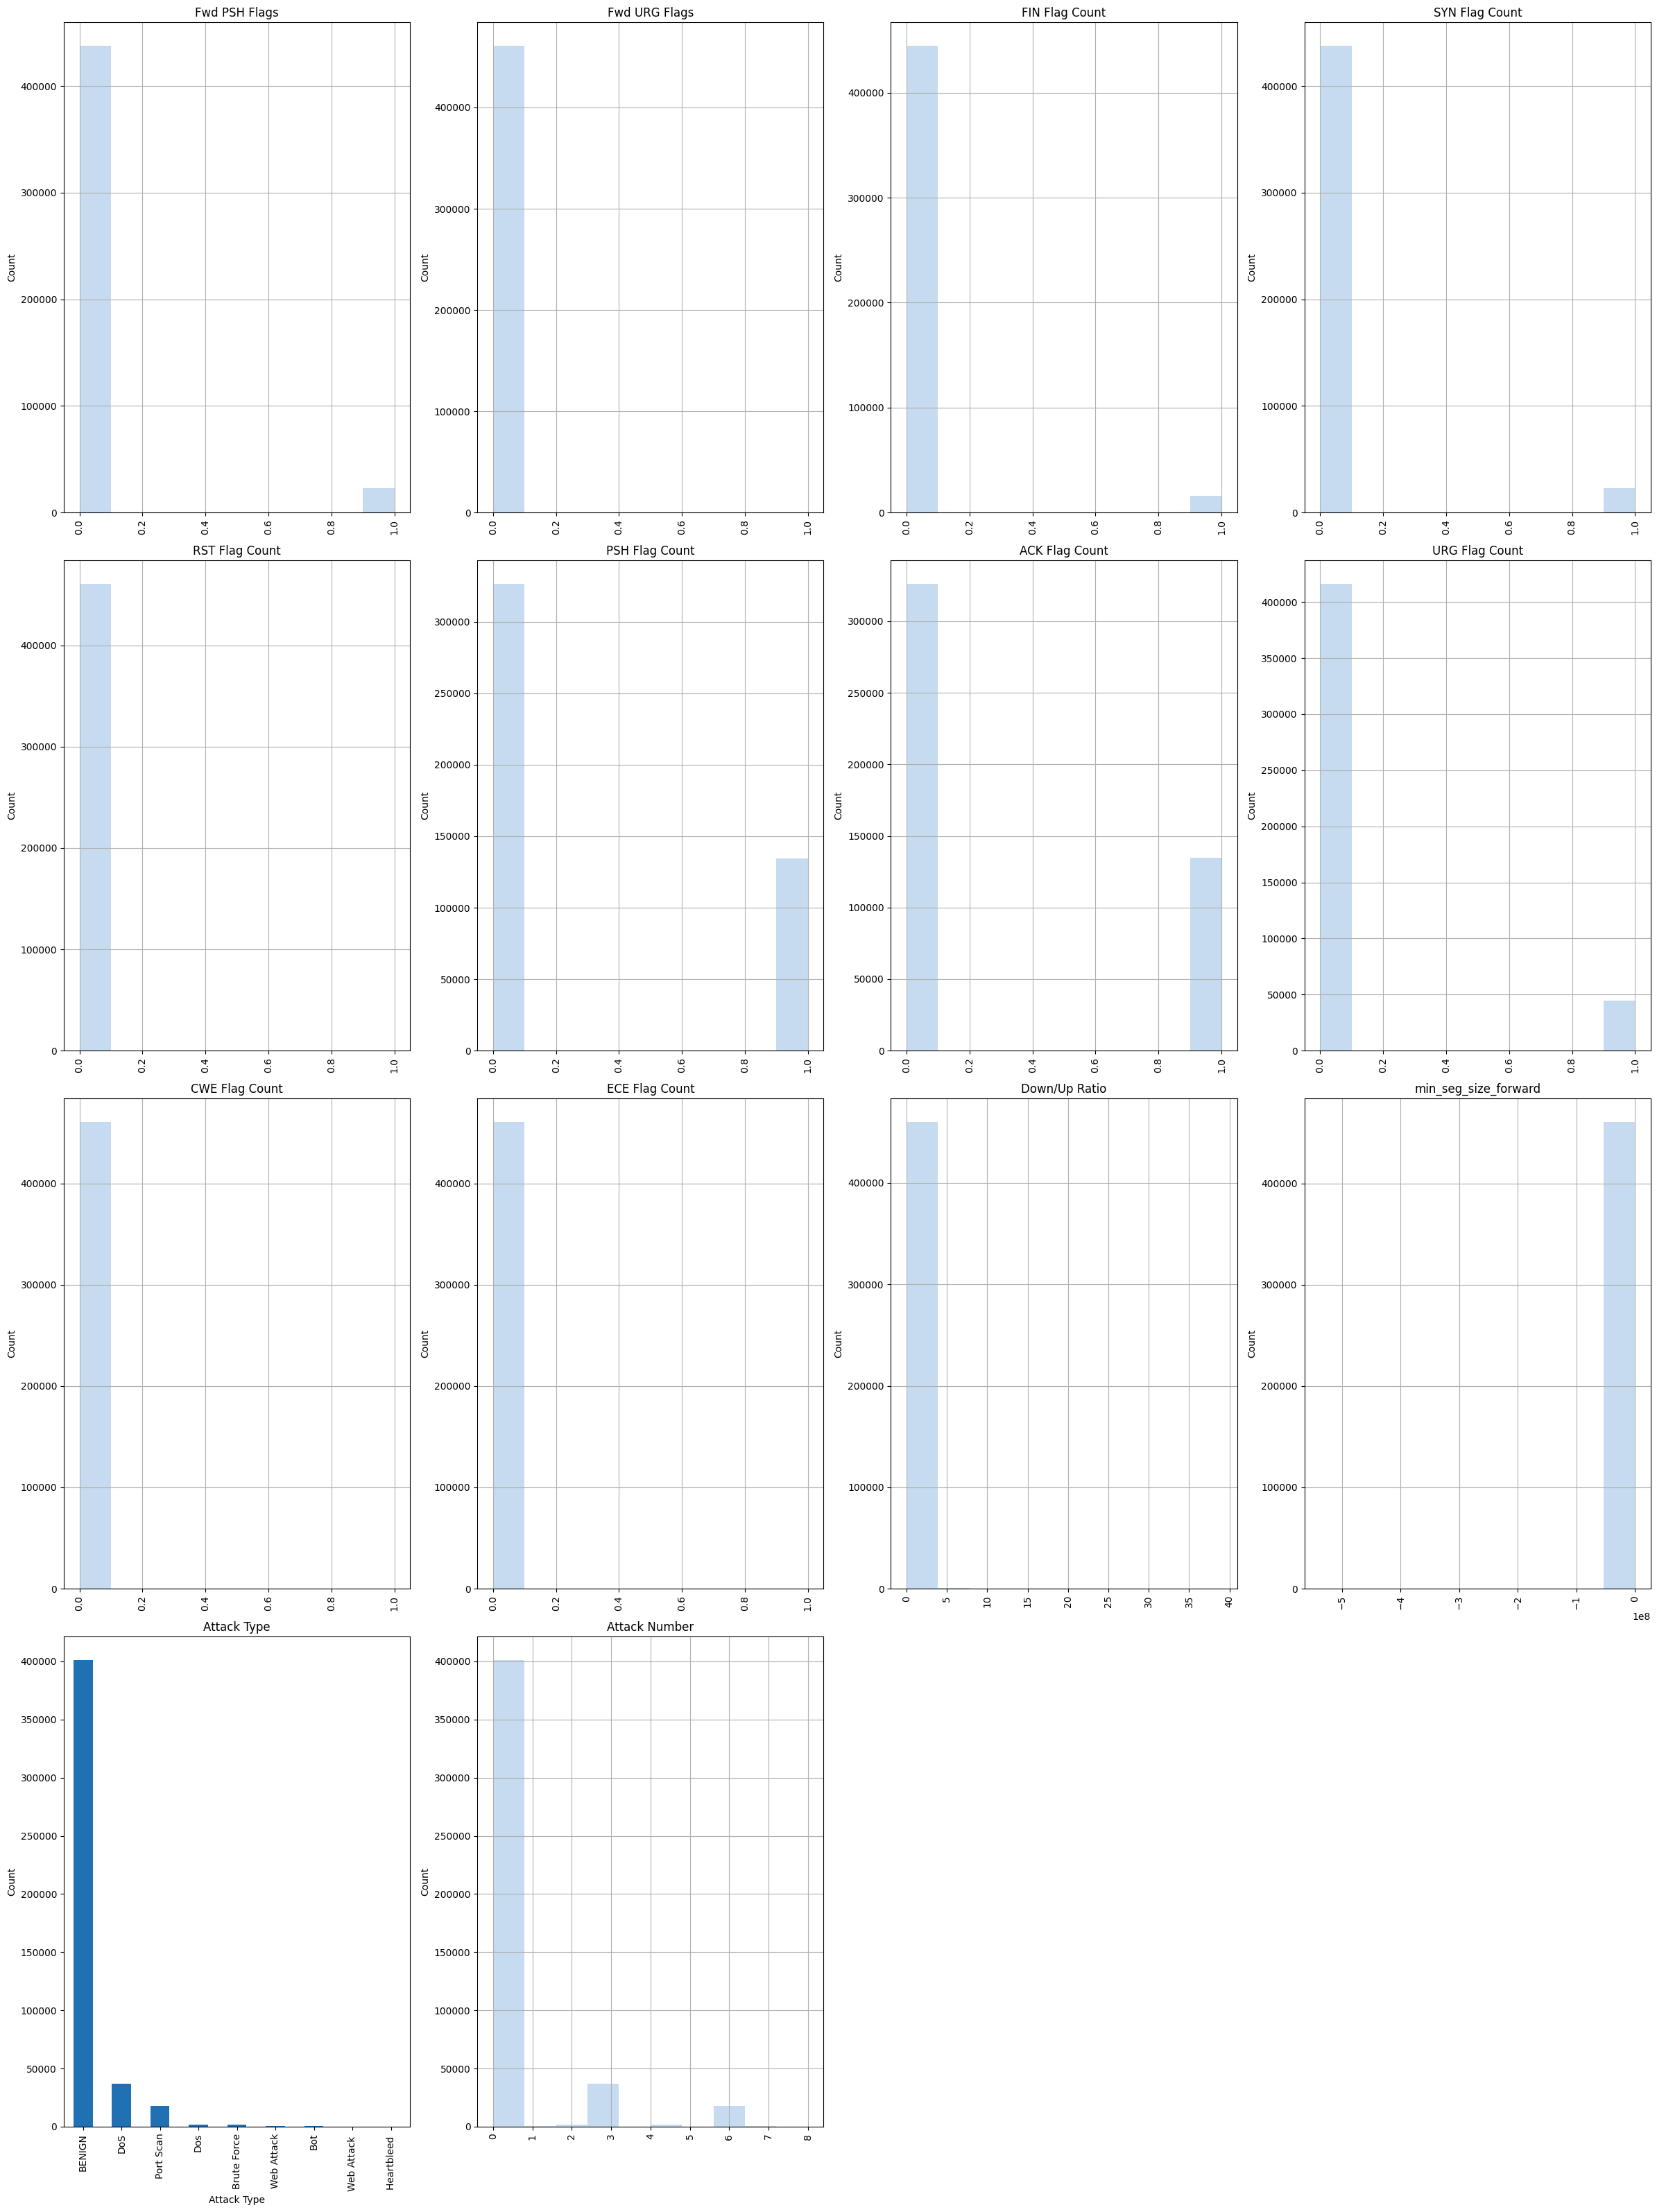

In [102]:
'''Generating a set of visualizations for columns that have more than one unique value but less than 50 unique values.
For categorical columns, a bar plot is generated showing the count of each unique value.
For numerical columns, a histogram is generated.'''
unique_values = sampled_data.nunique()
selected_cols = sampled_data[[col for col in sampled_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

In [103]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

In [ ]:
# Plotting the pairs of strongly positive correlated features in the sampled_data that have a correlation coefficient of 0.85 or higher
cols = list(sampled_data.columns)[:-2]
high_corr_pairs = []
corr_th = 0.85

for i in range(len(cols)):
  for j in range(i + 1, len(cols)):
    val = sampled_data[cols[i]].corr(sampled_data[cols[j]])
    # If the correlation coefficient is NaN or below the threshold, skip to the next pair
    if np.isnan(val) or val < corr_th:
      continue
    high_corr_pairs.append((val, cols[i], cols[j]))

size, cols = len(high_corr_pairs), 4
rows, rem =  size // cols, size % cols
if rem:
  rows += 1

fig, axs = plt.subplots(rows, cols, figsize = (24, int(size * 1.7)))
for i in range(rows):
    for j in range(cols):
      try:
        val, x, y = high_corr_pairs[i * cols + j]
        if val > 0.99:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'green', alpha = 0.1)
        else:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'blue', alpha = 0.1)
        axs[i, j].set_xlabel(x)
        axs[i, j].set_ylabel(y)
        axs[i, j].set_title(f'{x} vs\n{y} ({val:.2f})')
      except IndexError:
        fig.delaxes(axs[i, j])

fig.tight_layout()
plt.show()

/home/aayush/Study/cc/env/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/aayush/Study/cc/env/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [105]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)
df.drop('Attack Number', axis = 1, inplace = True)

/tmp/ipykernel_100727/1774021005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Attack Number', axis = 1, inplace = True)


In [48]:
# Identifying outliers
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                             Outlier Count  Outlier Percentage
Destination Port                    101107               21.94
Flow Duration                        86284               18.72
Total Fwd Packets                    45277                9.82
Total Backward Packets               46268               10.04
Total Length of Fwd Packets          55885               12.12
Total Length of Bwd Packets         102501               22.24
Fwd Packet Length Max                32749                7.11
Fwd Packet Length Min                 1535                0.33
Fwd Packet Length Mean               30099                6.53
Fwd Packet Length Std                36798                7.98
Bwd Packet Length Max               102375               22.21
Bwd Packet Length Min                 9451                2.05
Bwd Packet Length Mean               73897               16.03
Bwd Packet Length Std               102080               22.15
Flow Bytes/s                         86598             

In [49]:
# Identifying outliers based on attack type
outlier_counts = {}
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        attack_data = sampled_data[i][sampled_data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: Destination Port
- BENIGN: 85633 (21.34%)
- Port Scan: 2202 (12.13%)
- DoS: 0 (0.00%)
- Brute Force: 0 (0.00%)
- Dos: 0 (0.00%)
- Bot: 127 (32.56%)
- Web Attack: 3 (0.66%)
- Web Attack : 0 (0.00%)
- Heartbleed : 0 (0.00%)

Feature: Flow Duration
- BENIGN: 92699 (23.10%)
- Port Scan: 414 (2.28%)
- DoS: 7112 (19.32%)
- Brute Force: 420 (23.05%)
- Dos: 395 (19.42%)
- Bot: 0 (0.00%)
- Web Attack: 69 (15.13%)
- Web Attack : 1 (25.00%)
- Heartbleed : 0 (0.00%)

Feature: Total Fwd Packets
- BENIGN: 75691 (18.86%)
- Port Scan: 287 (1.58%)
- DoS: 457 (1.24%)
- Brute Force: 0 (0.00%)
- Dos: 4 (0.20%)
- Bot: 5 (1.28%)
- Web Attack: 69 (15.13%)
- Web Attack : 1 (25.00%)
- Heartbleed : 0 (0.00%)

Feature: Total Backward Packets
- BENIGN: 68171 (16.99%)
- Port Scan: 93 (0.51%)
- DoS: 3892 (10.57%)
- Brute Force: 0 (0.00%)
- Dos: 0 (0.00%)
- Bot: 5 (1.28%)
- Web Attack: 40 (8.77%)
- Web Attack : 1 (25.00%)
- Heartbleed : 0 (0.00%)

Feature: Total Length of Fwd Packets
- BENIGN: 80318 (20.02%

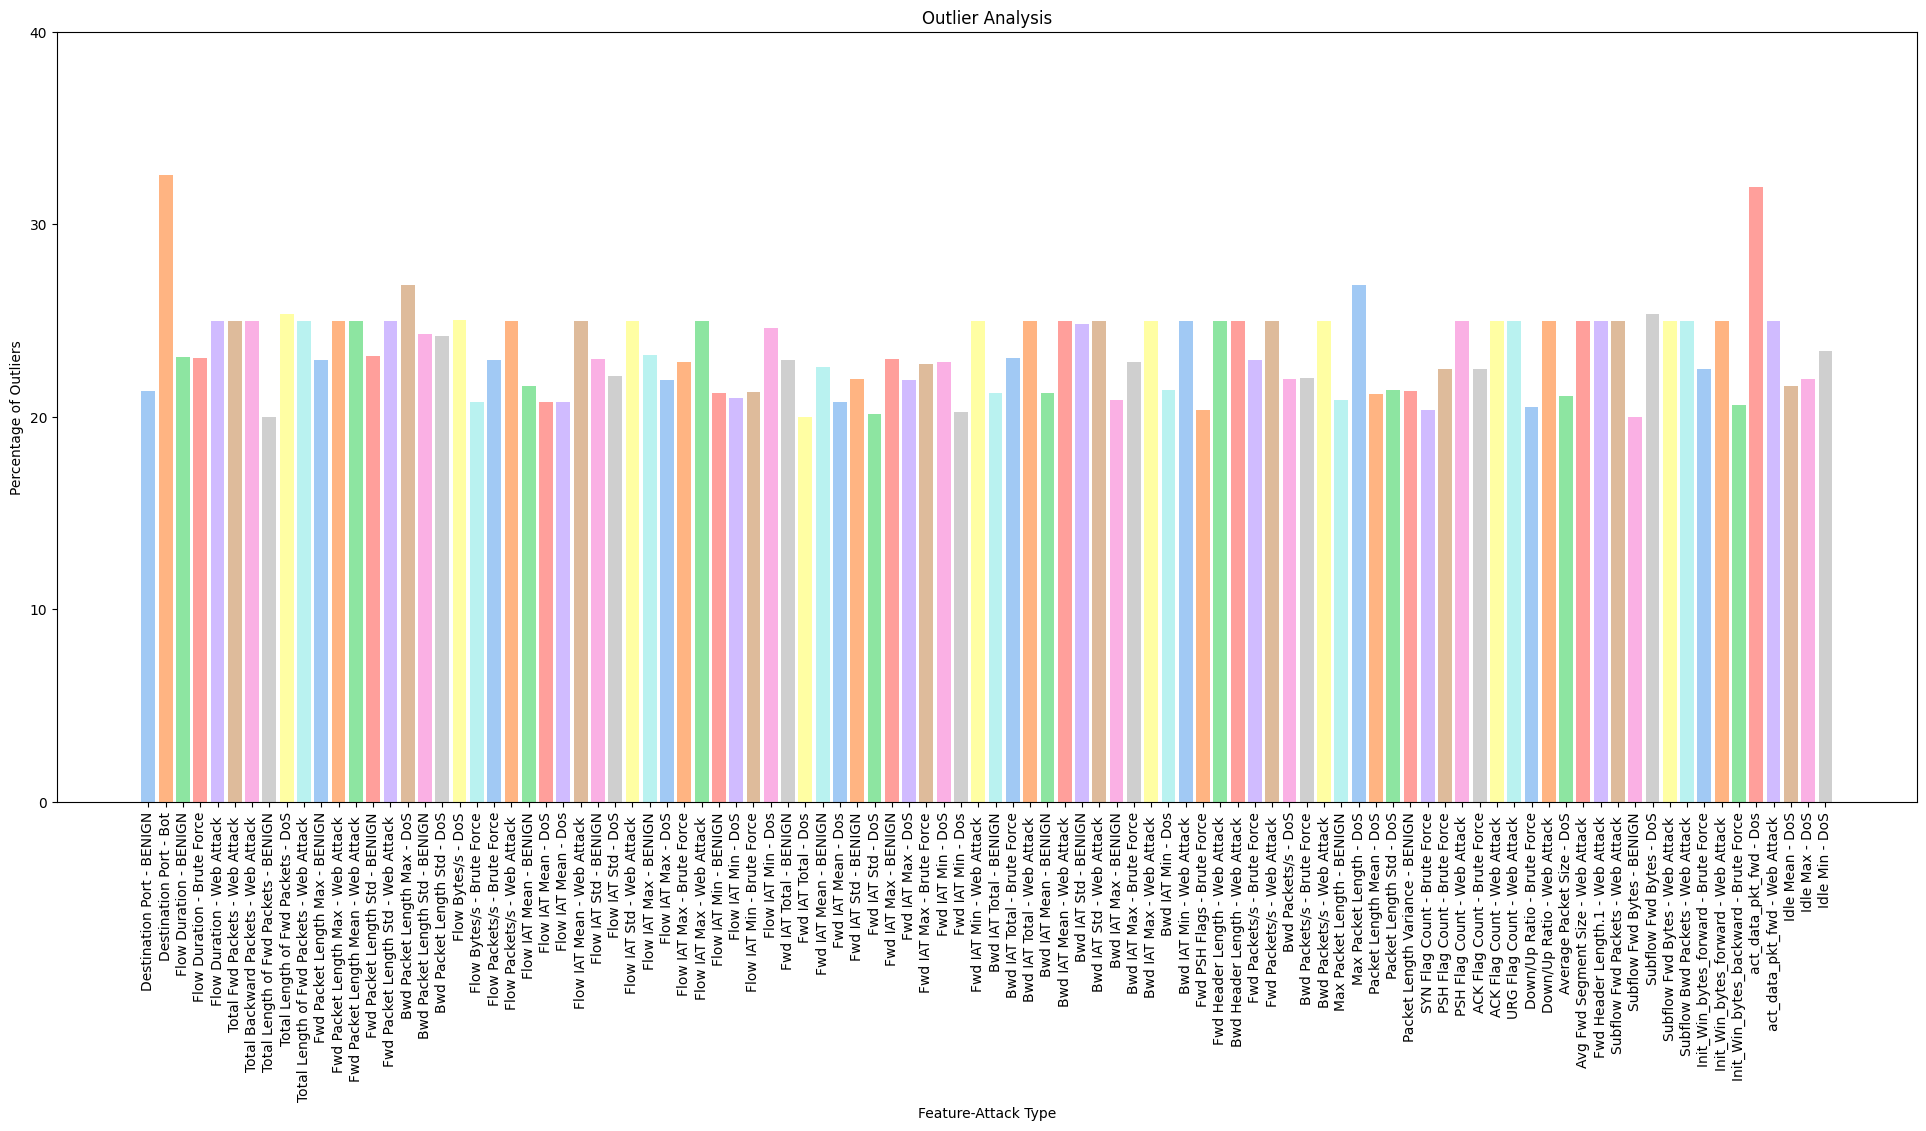

In [50]:
# Plotting the percentage of outliers that are higher than 20%
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
        if outlier_percent > 20:
            ax.bar(f'{i} - {attack_type}', outlier_percent)

ax.set_xlabel('Feature-Attack Type')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()

#### Visualization of column relationships (Categorical Variables)

/tmp/ipykernel_100727/2043510913.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)


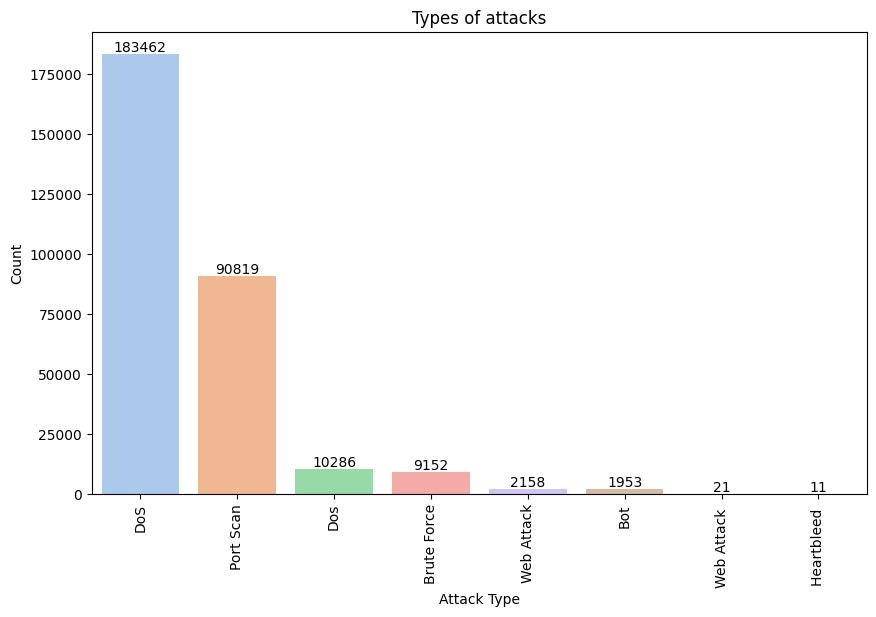

In [51]:
# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = df.loc[df['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

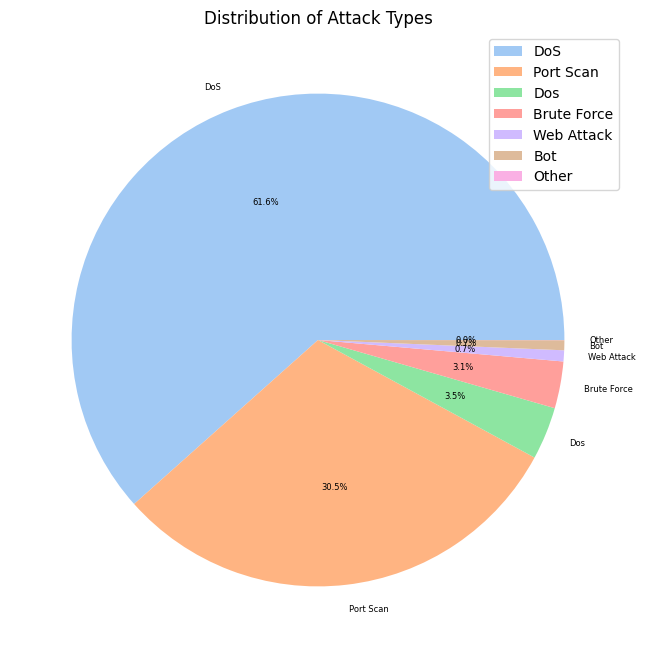

In [52]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

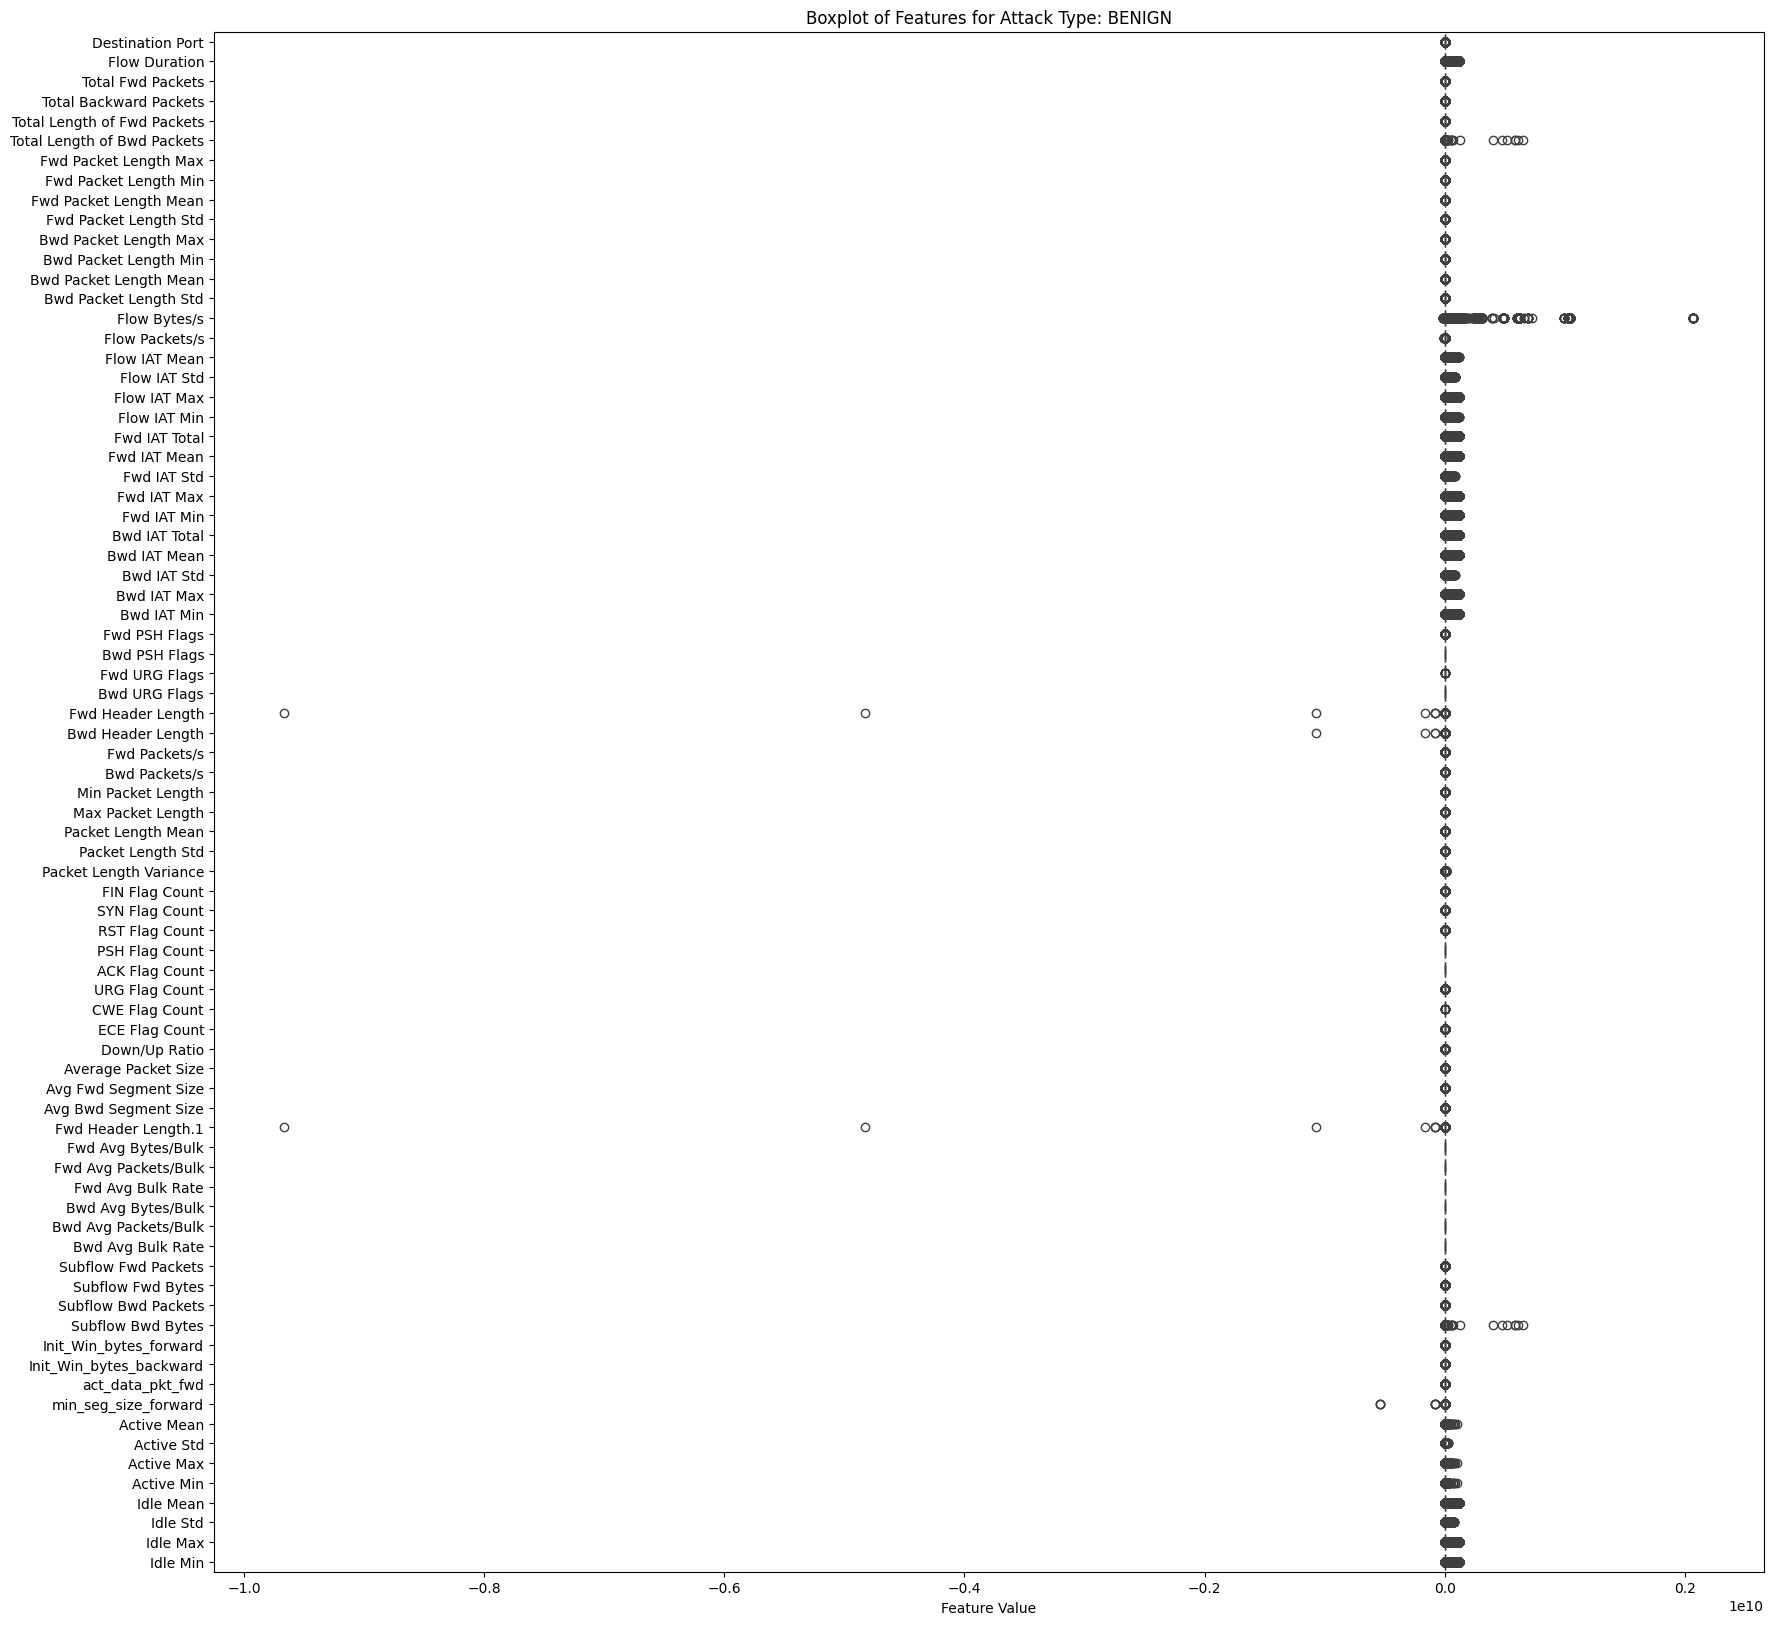

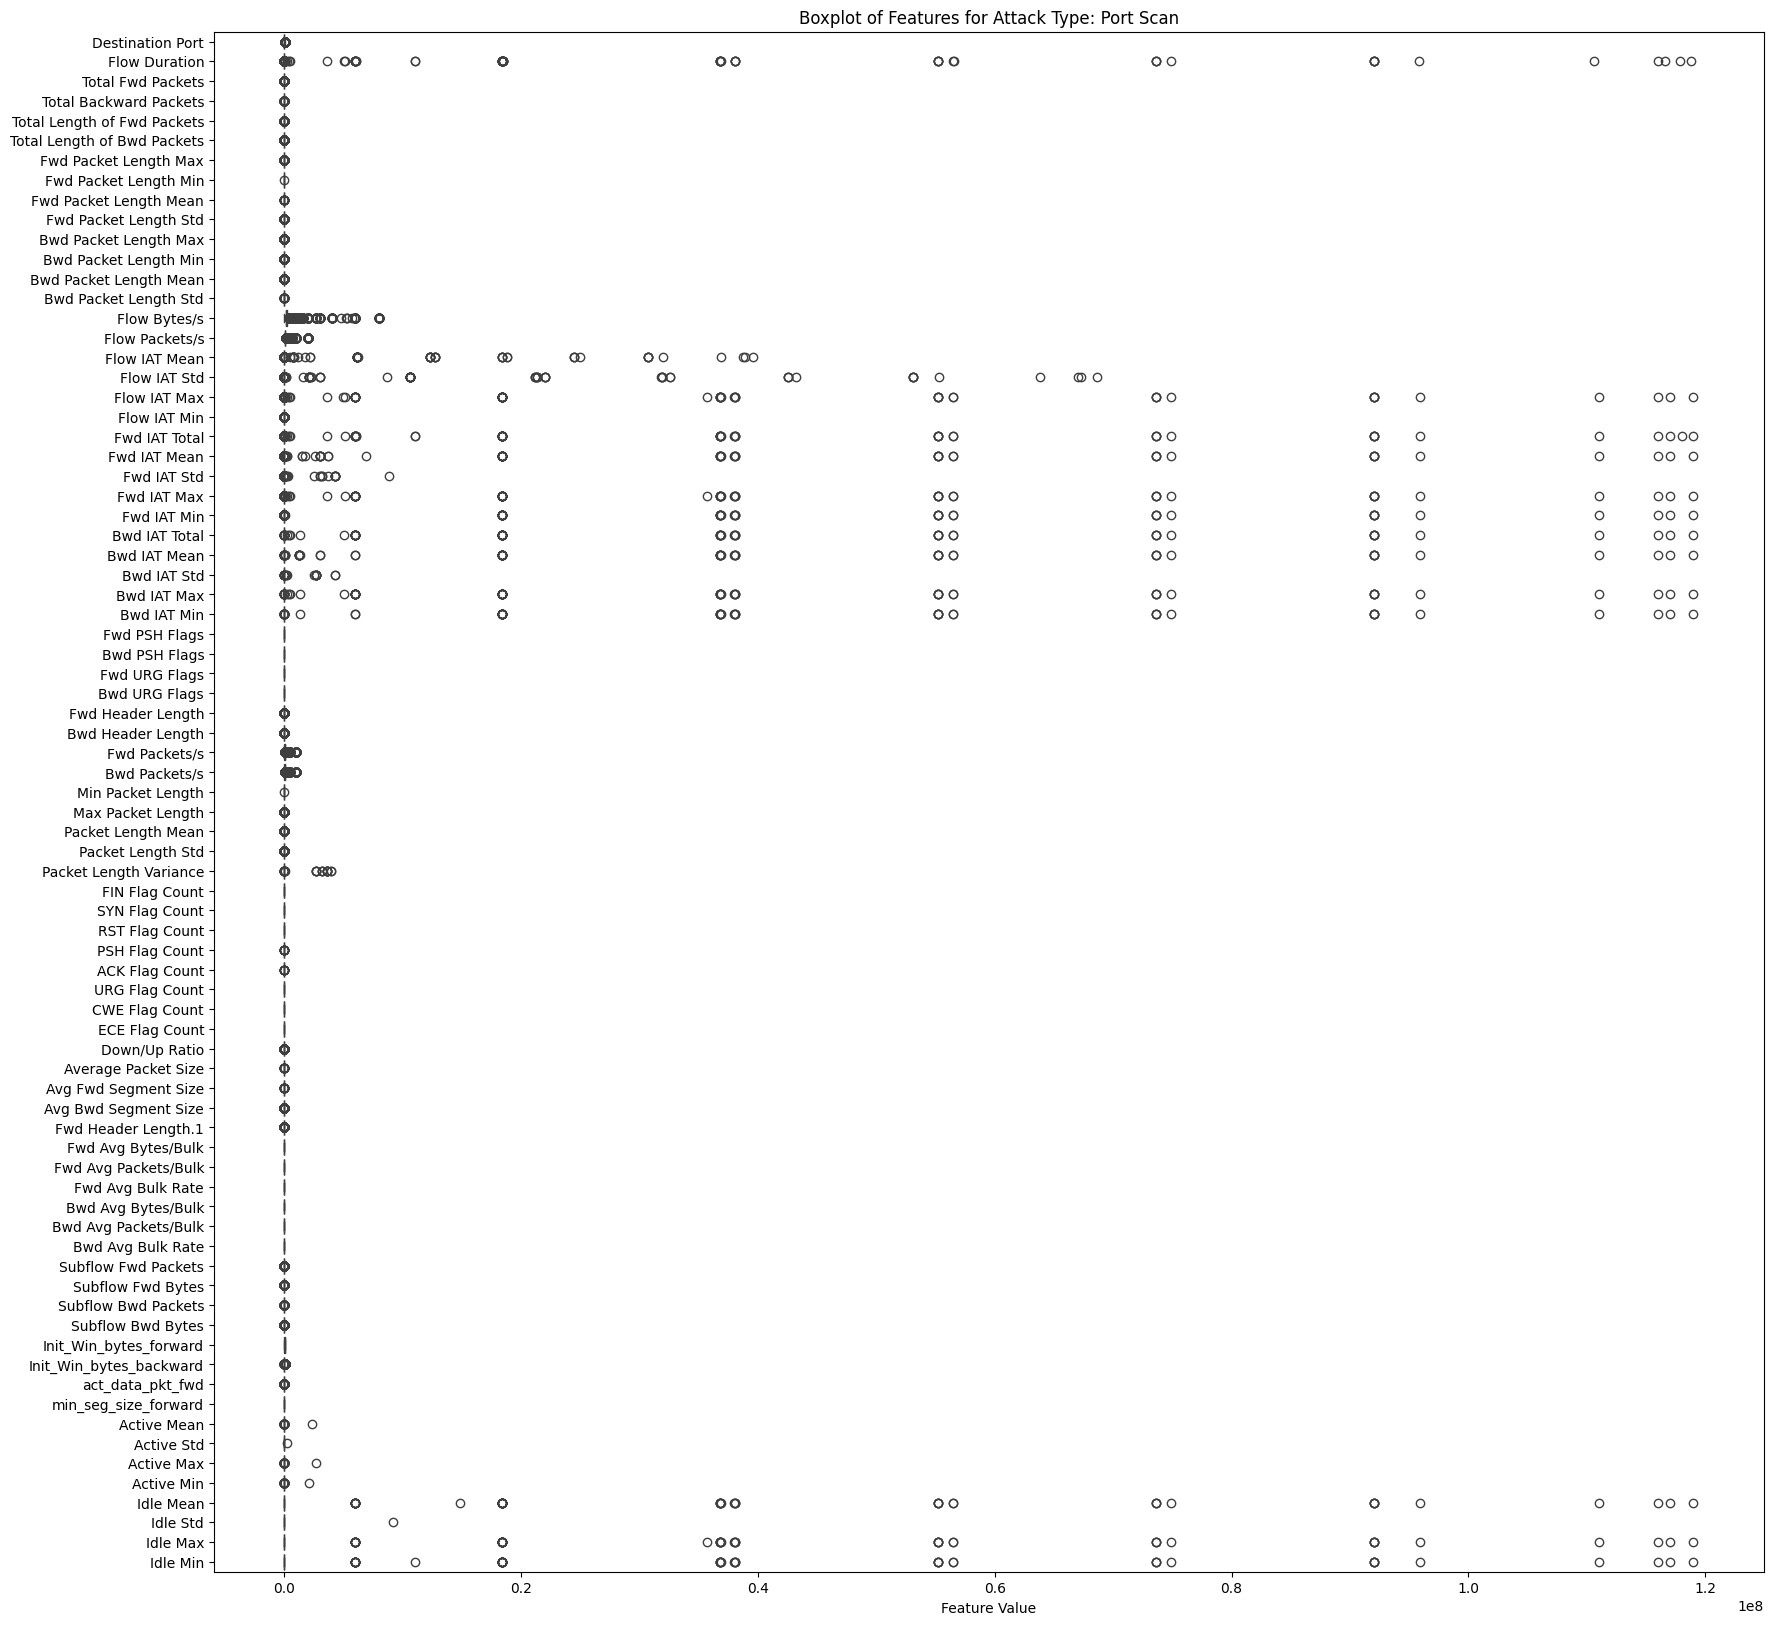

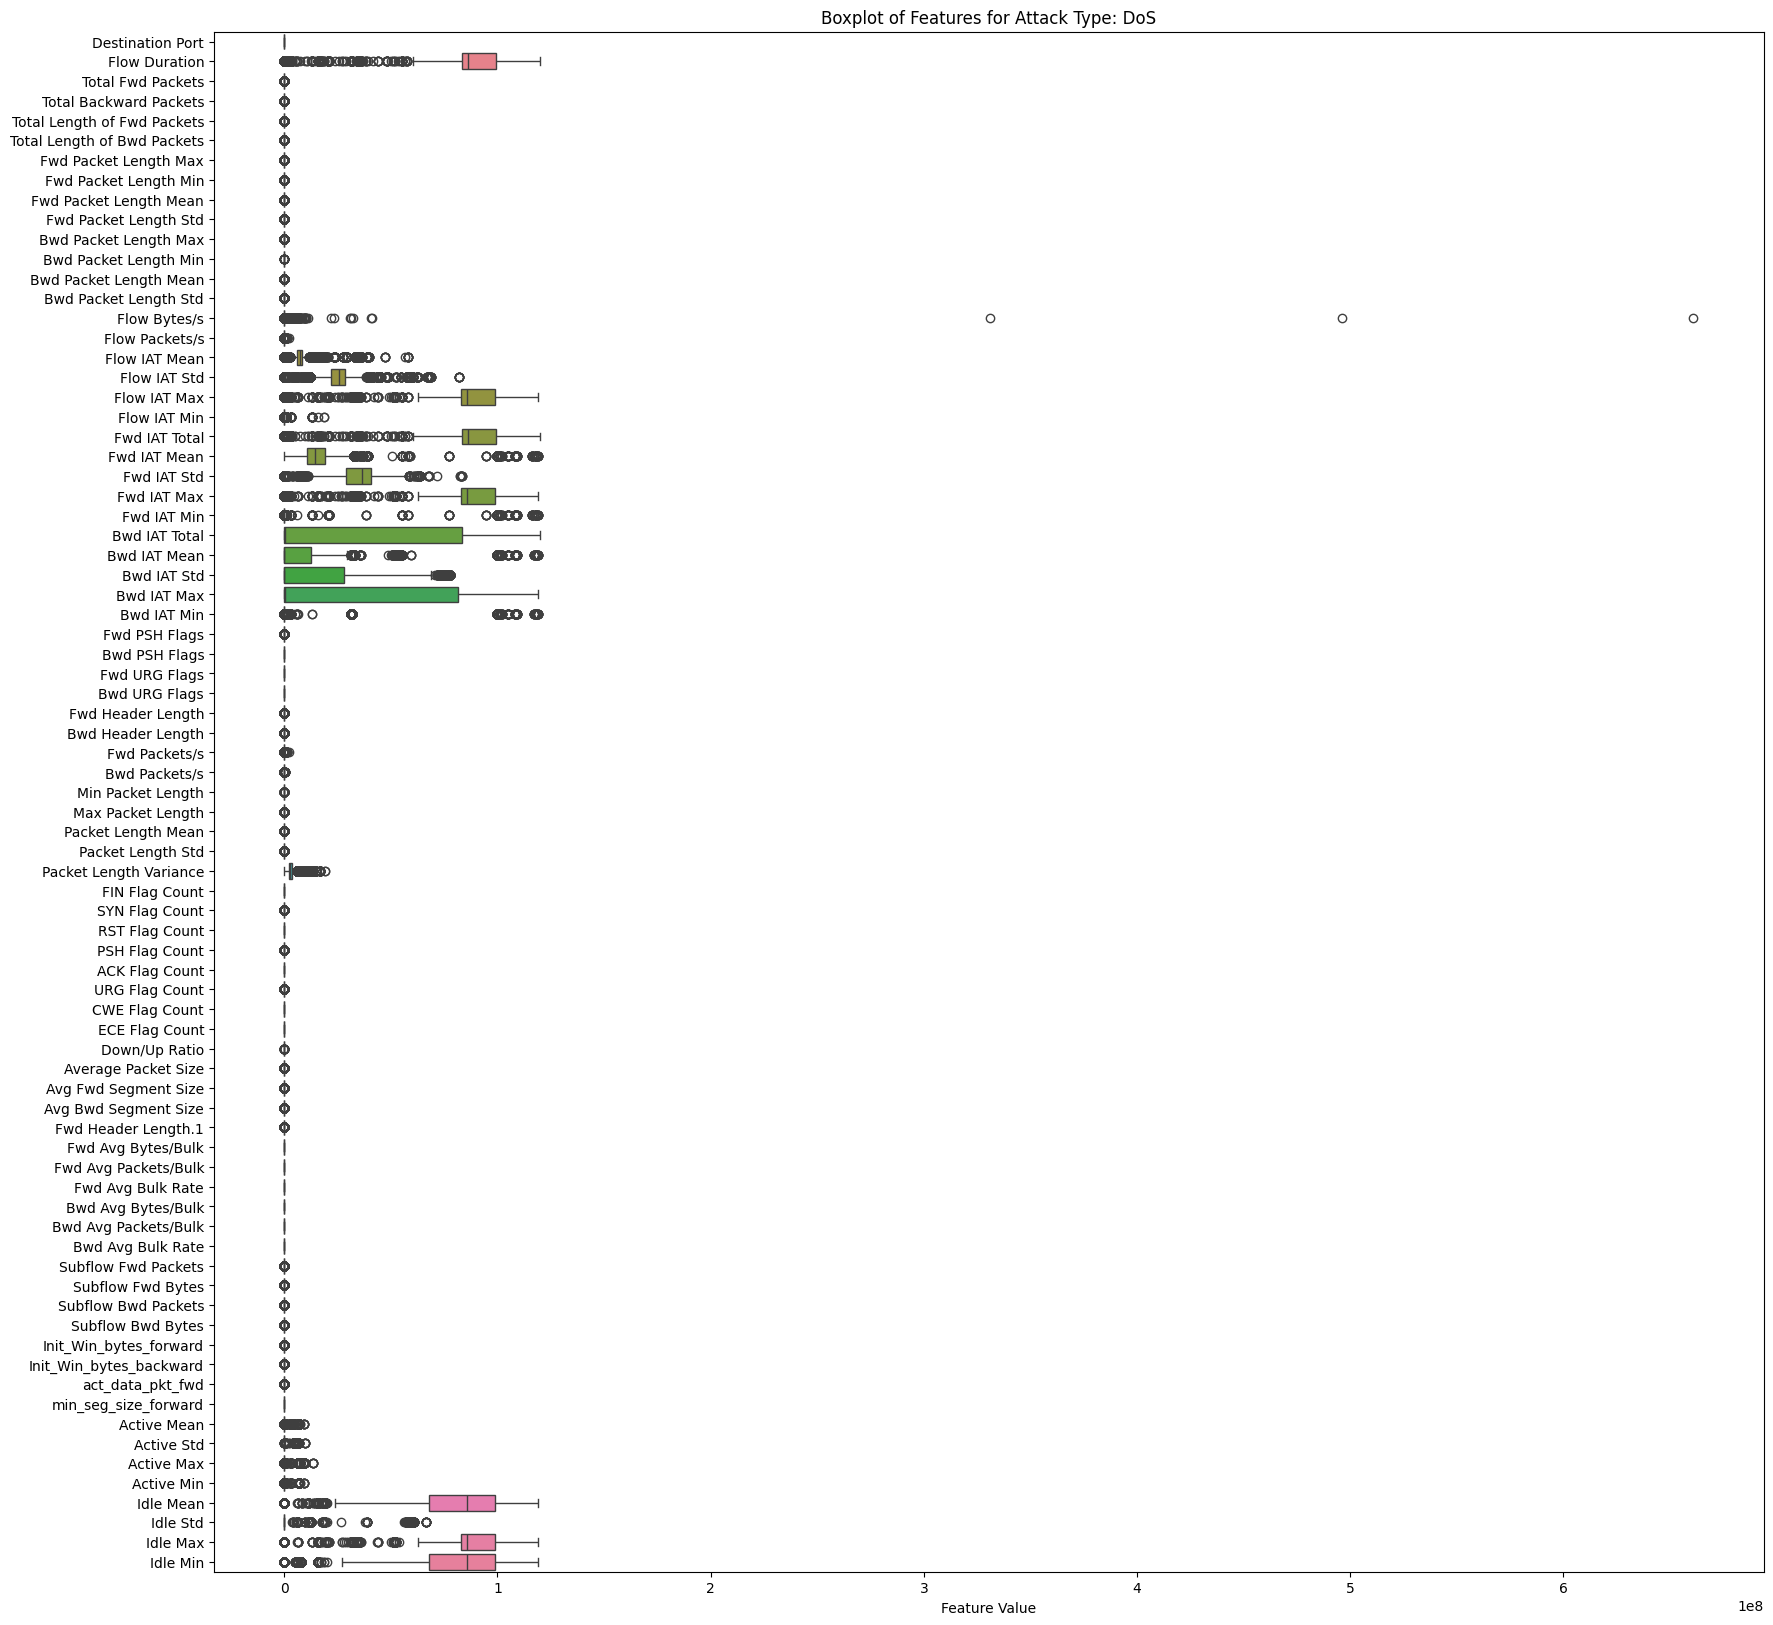

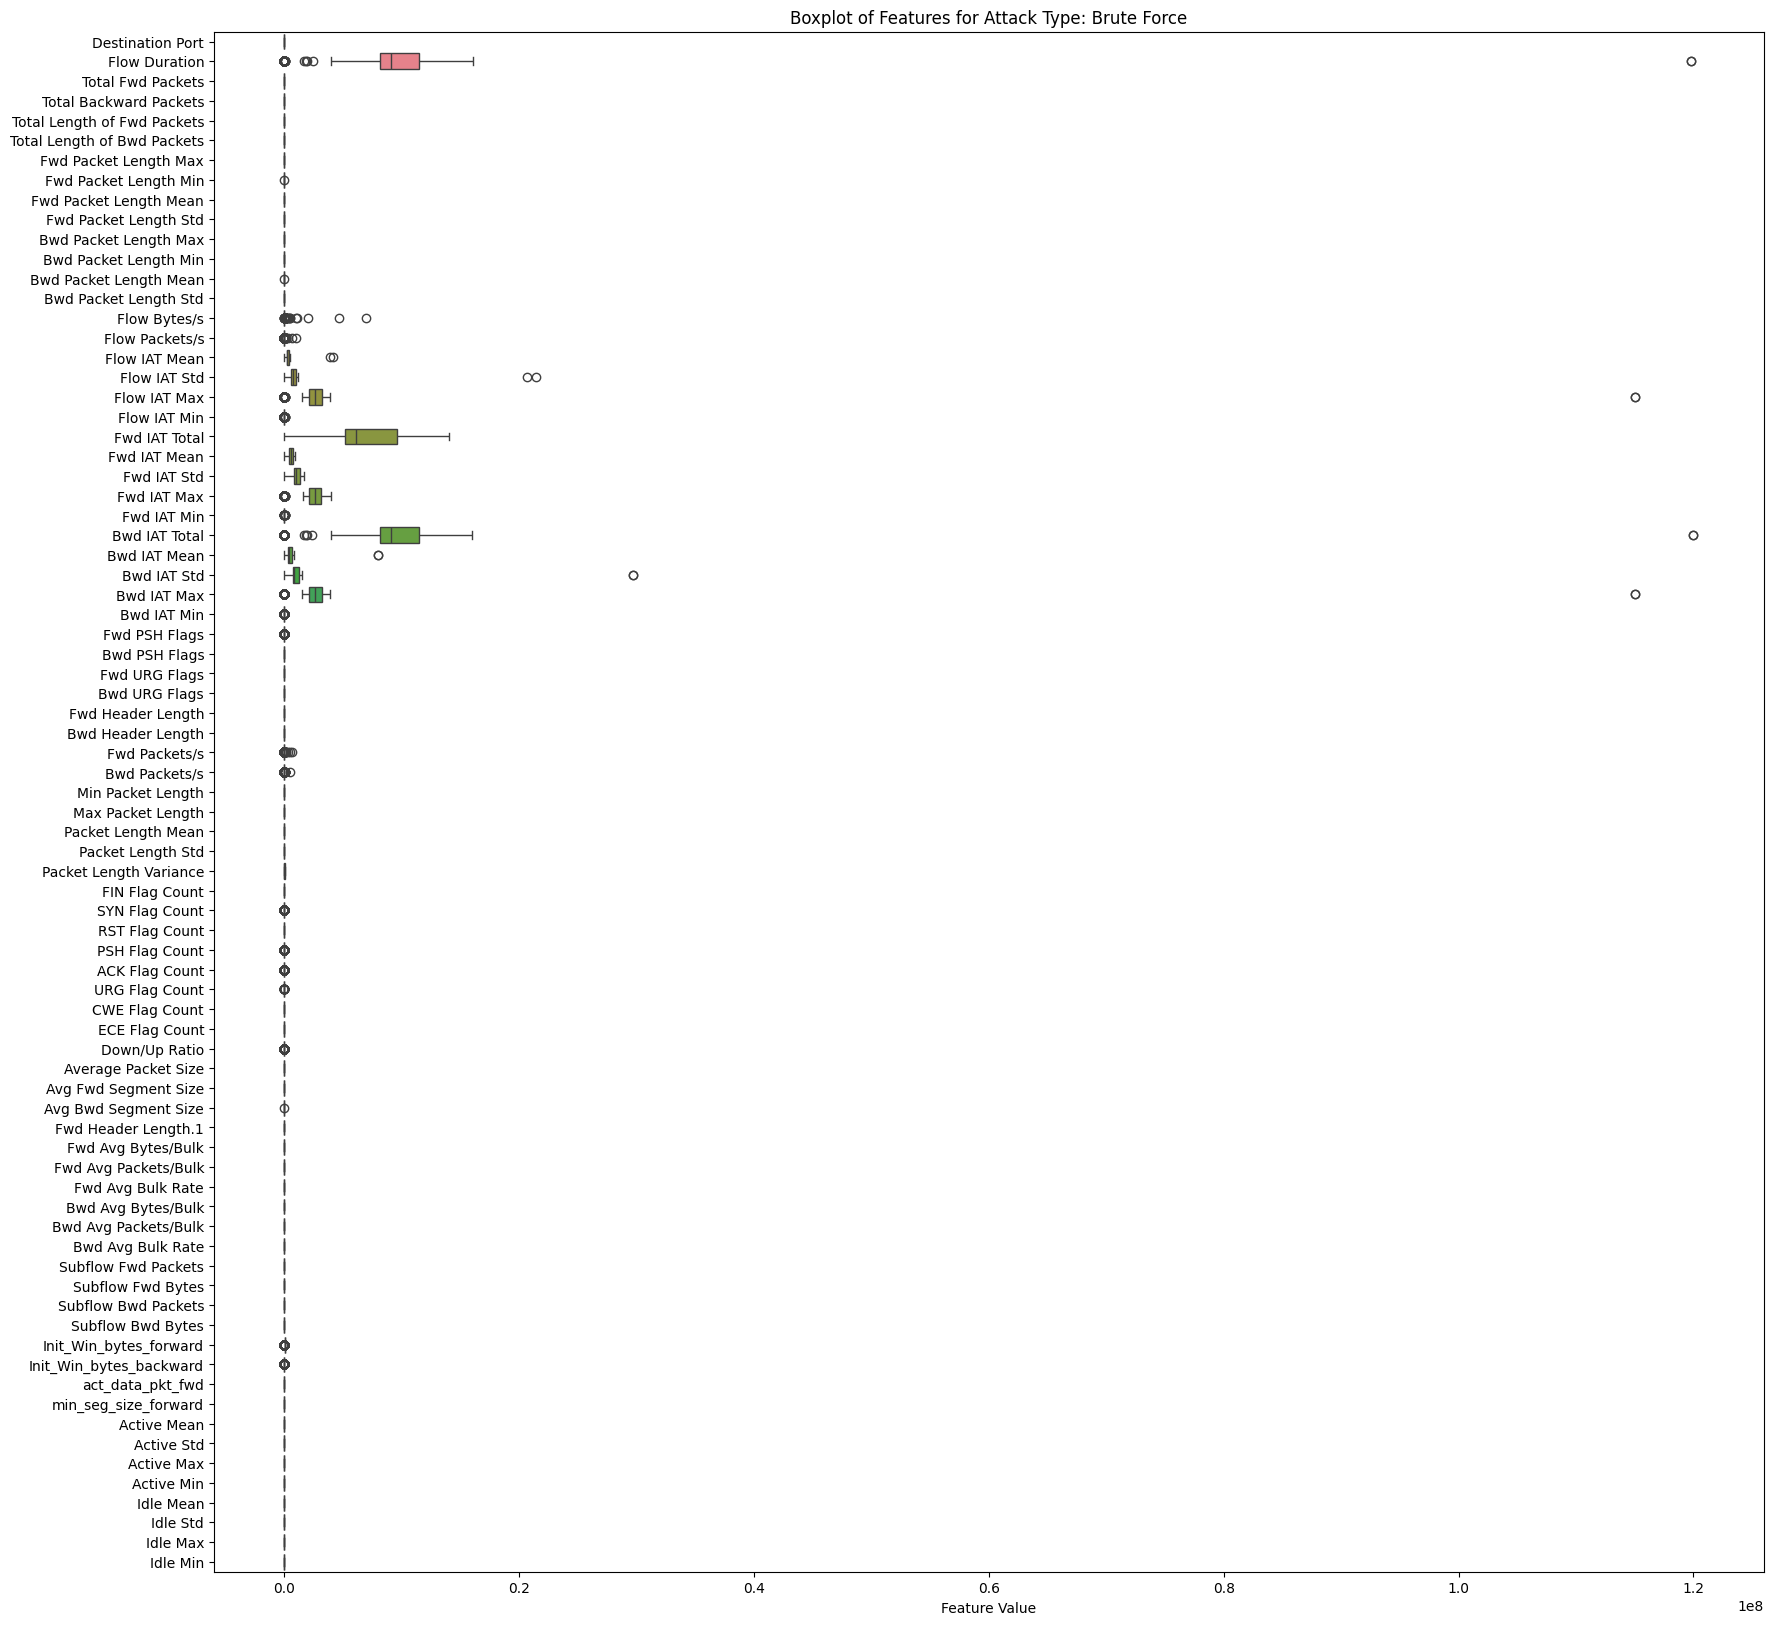

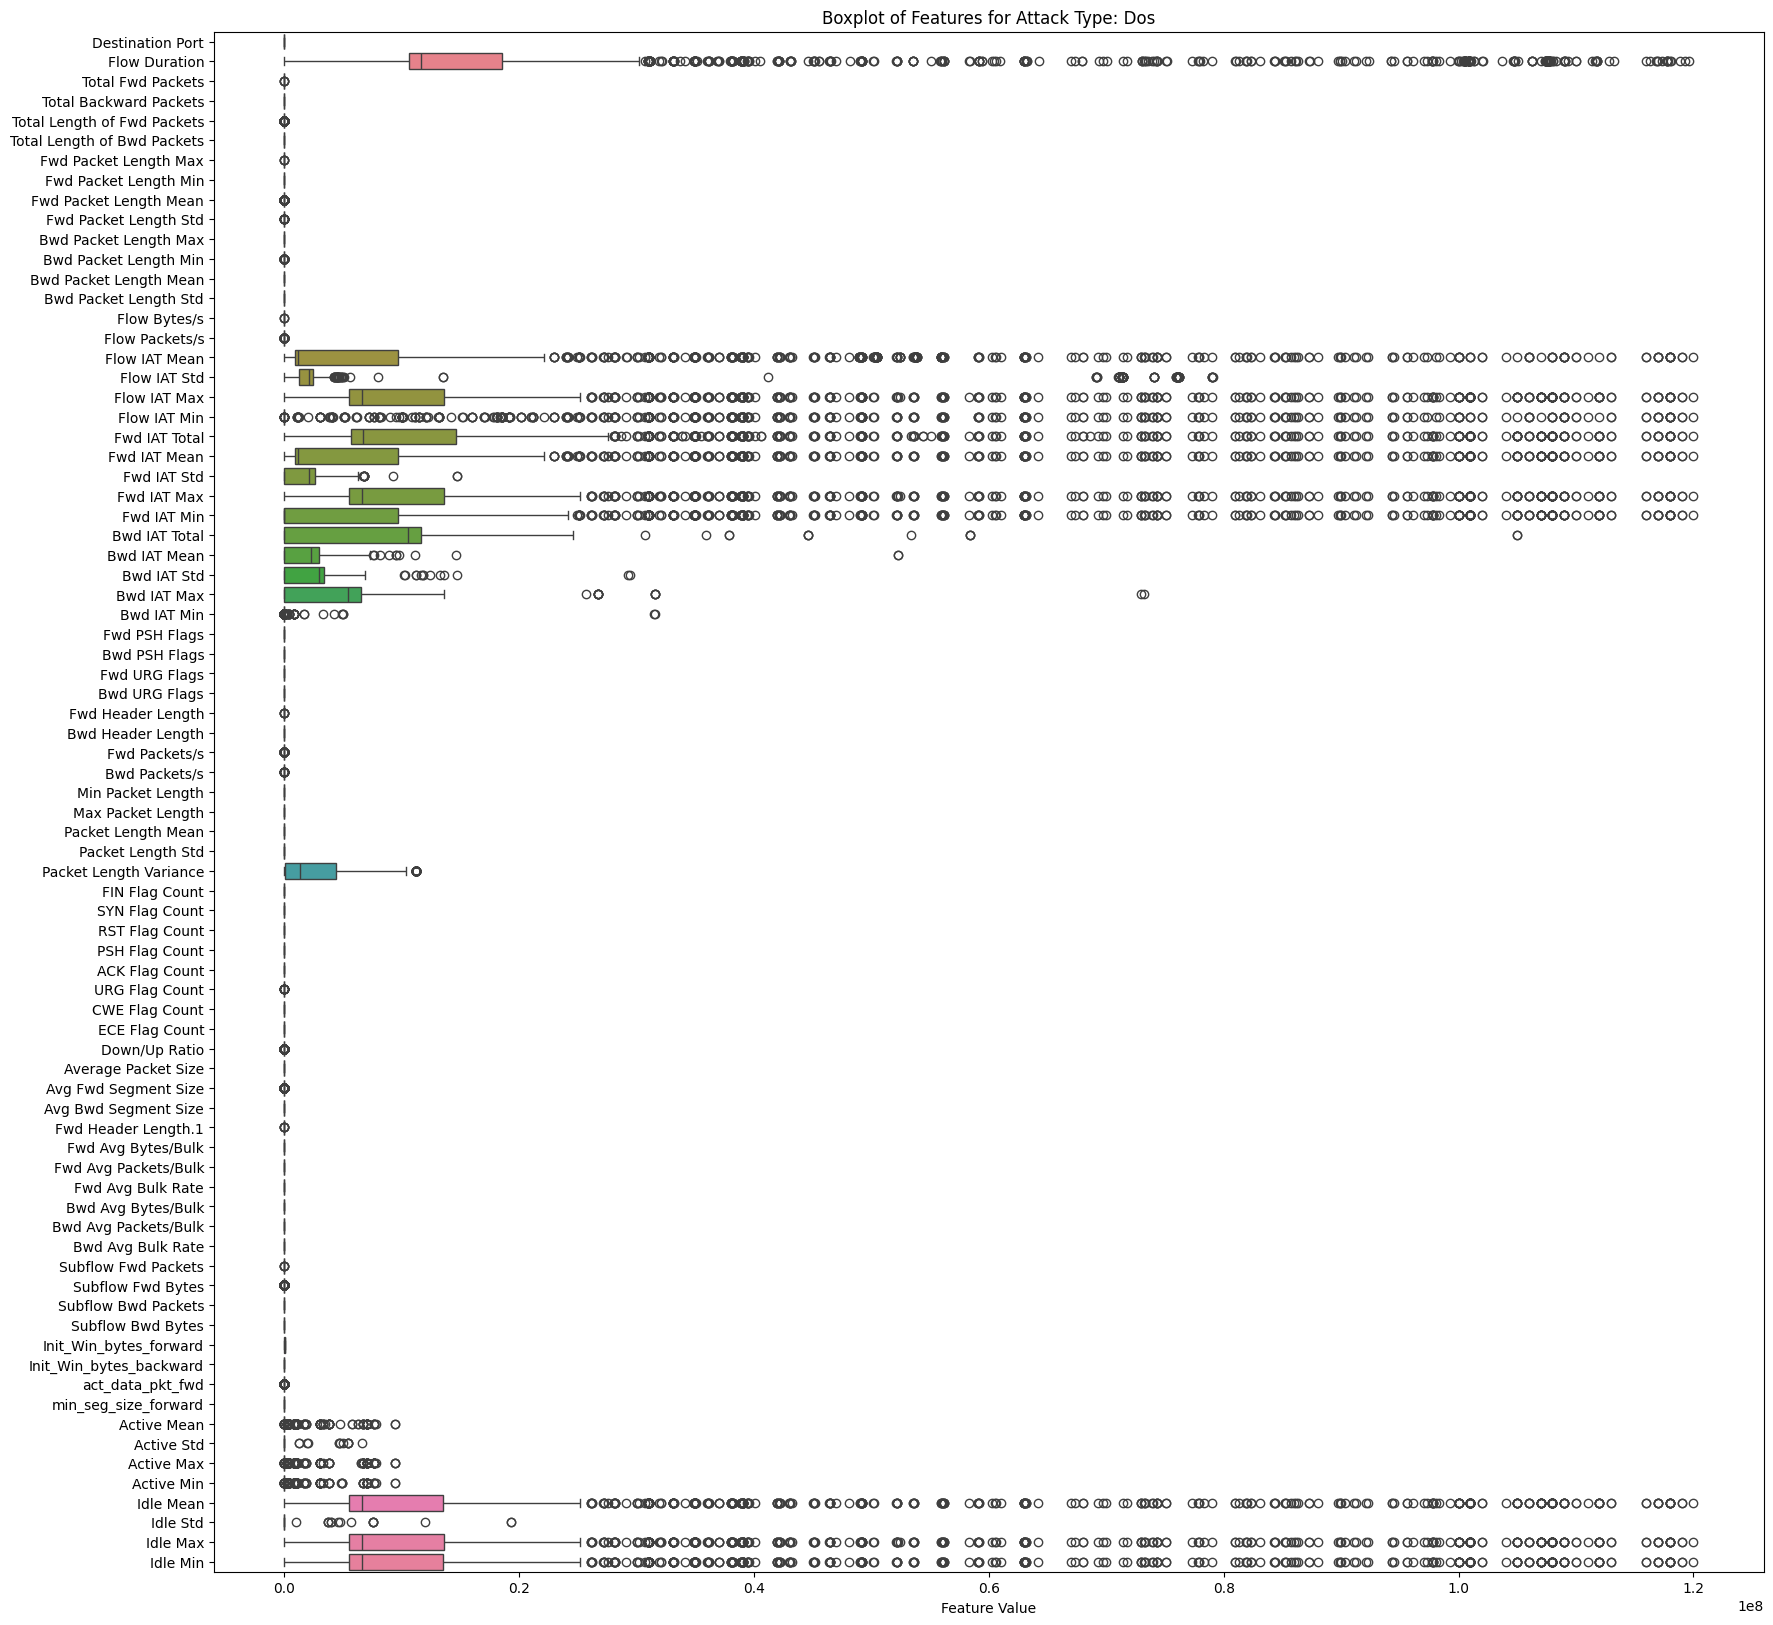

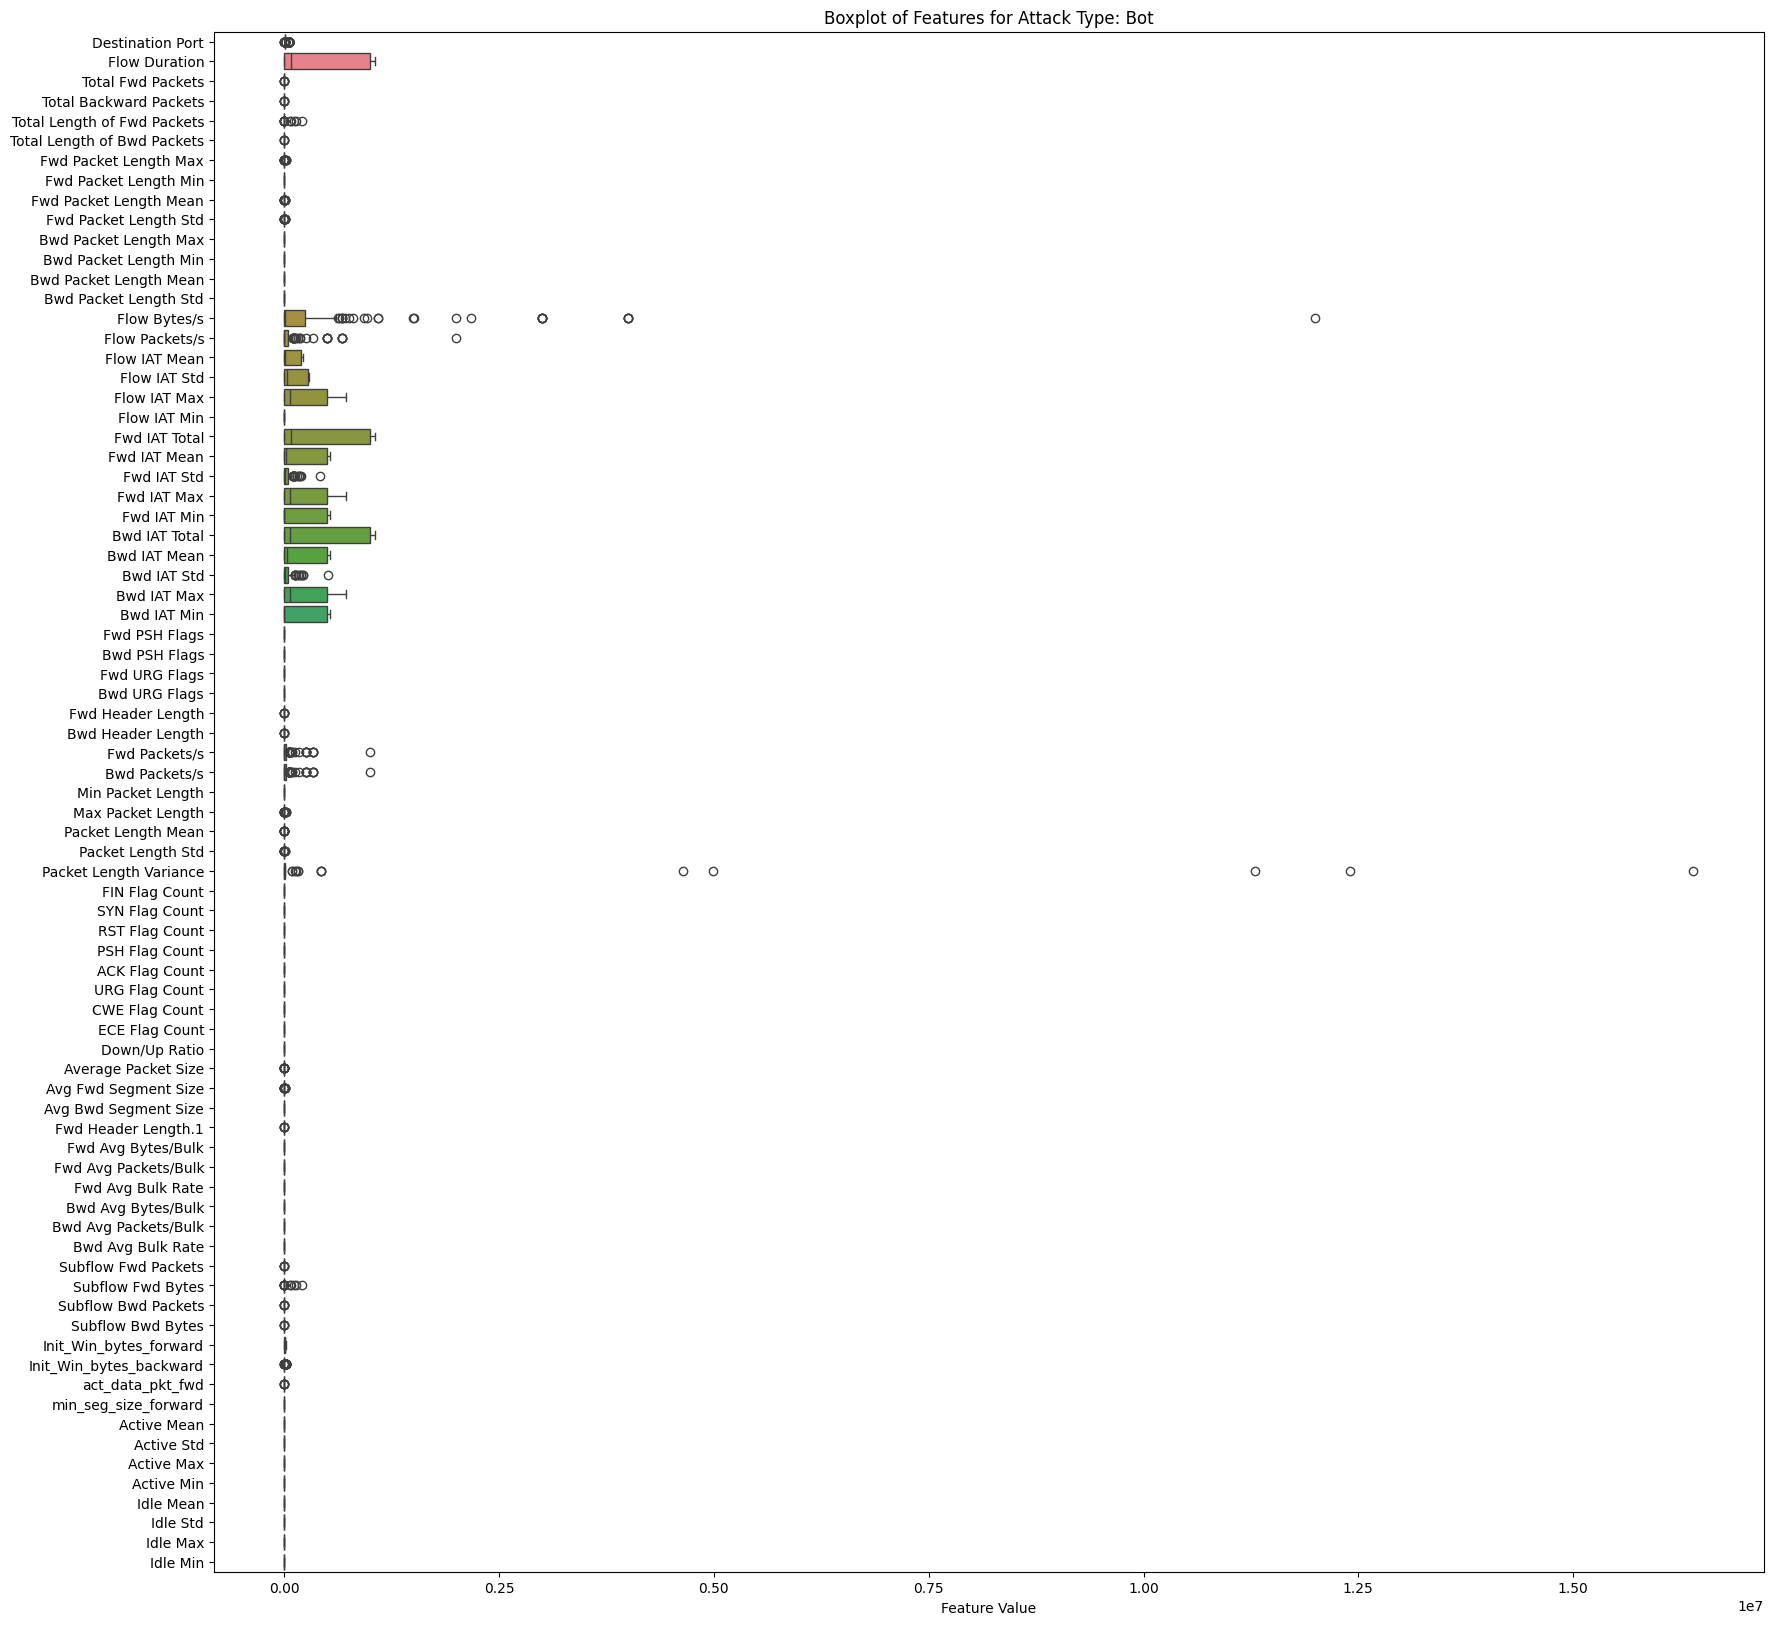

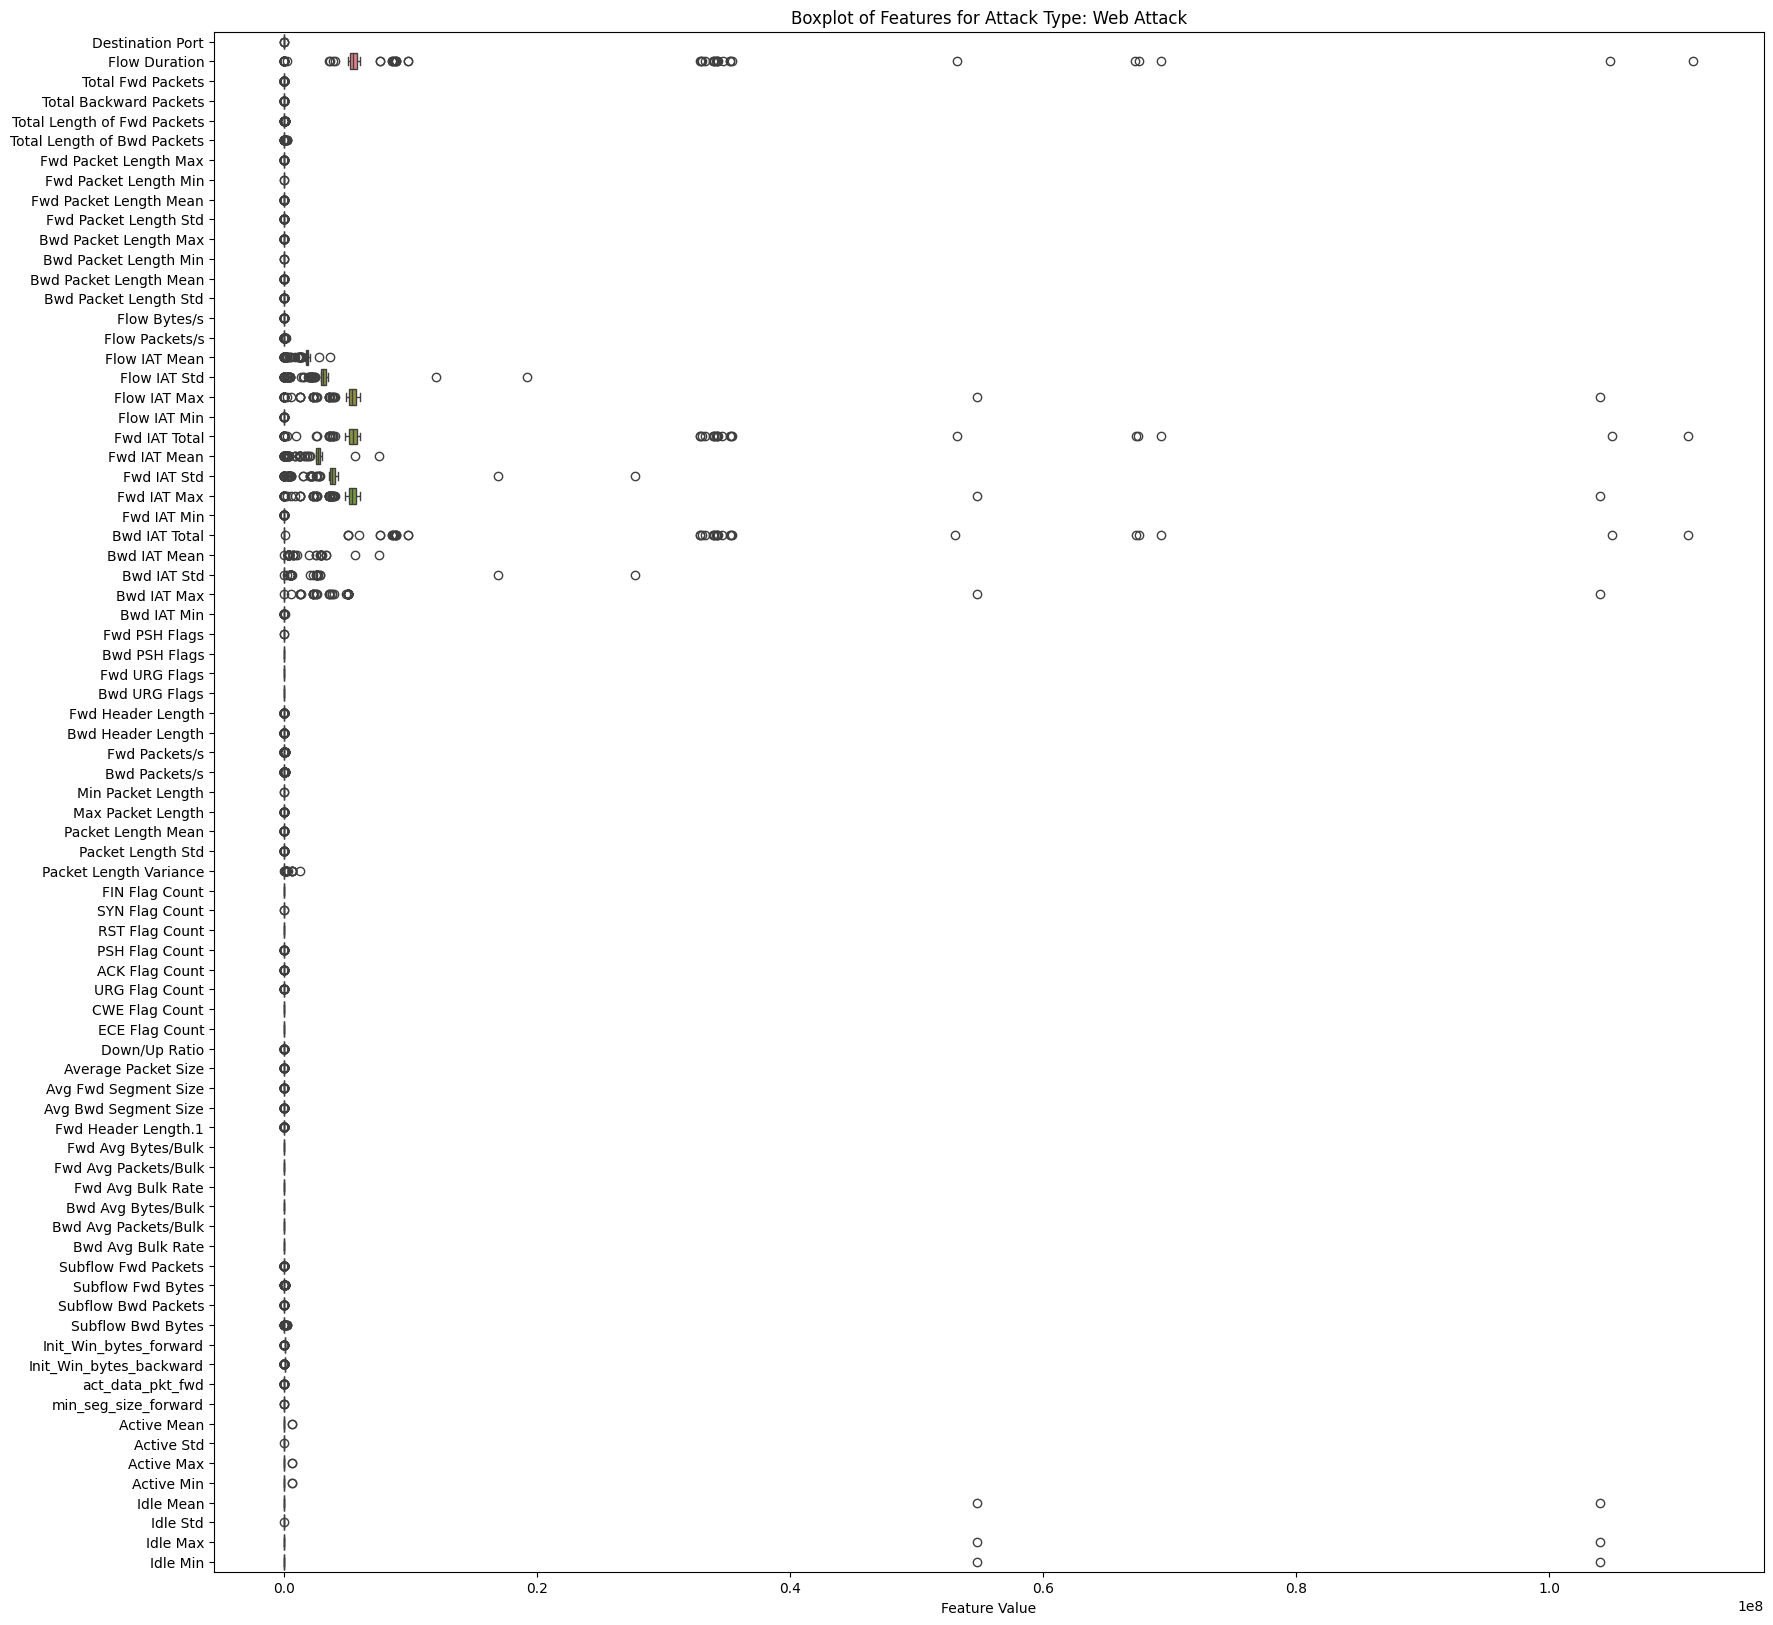

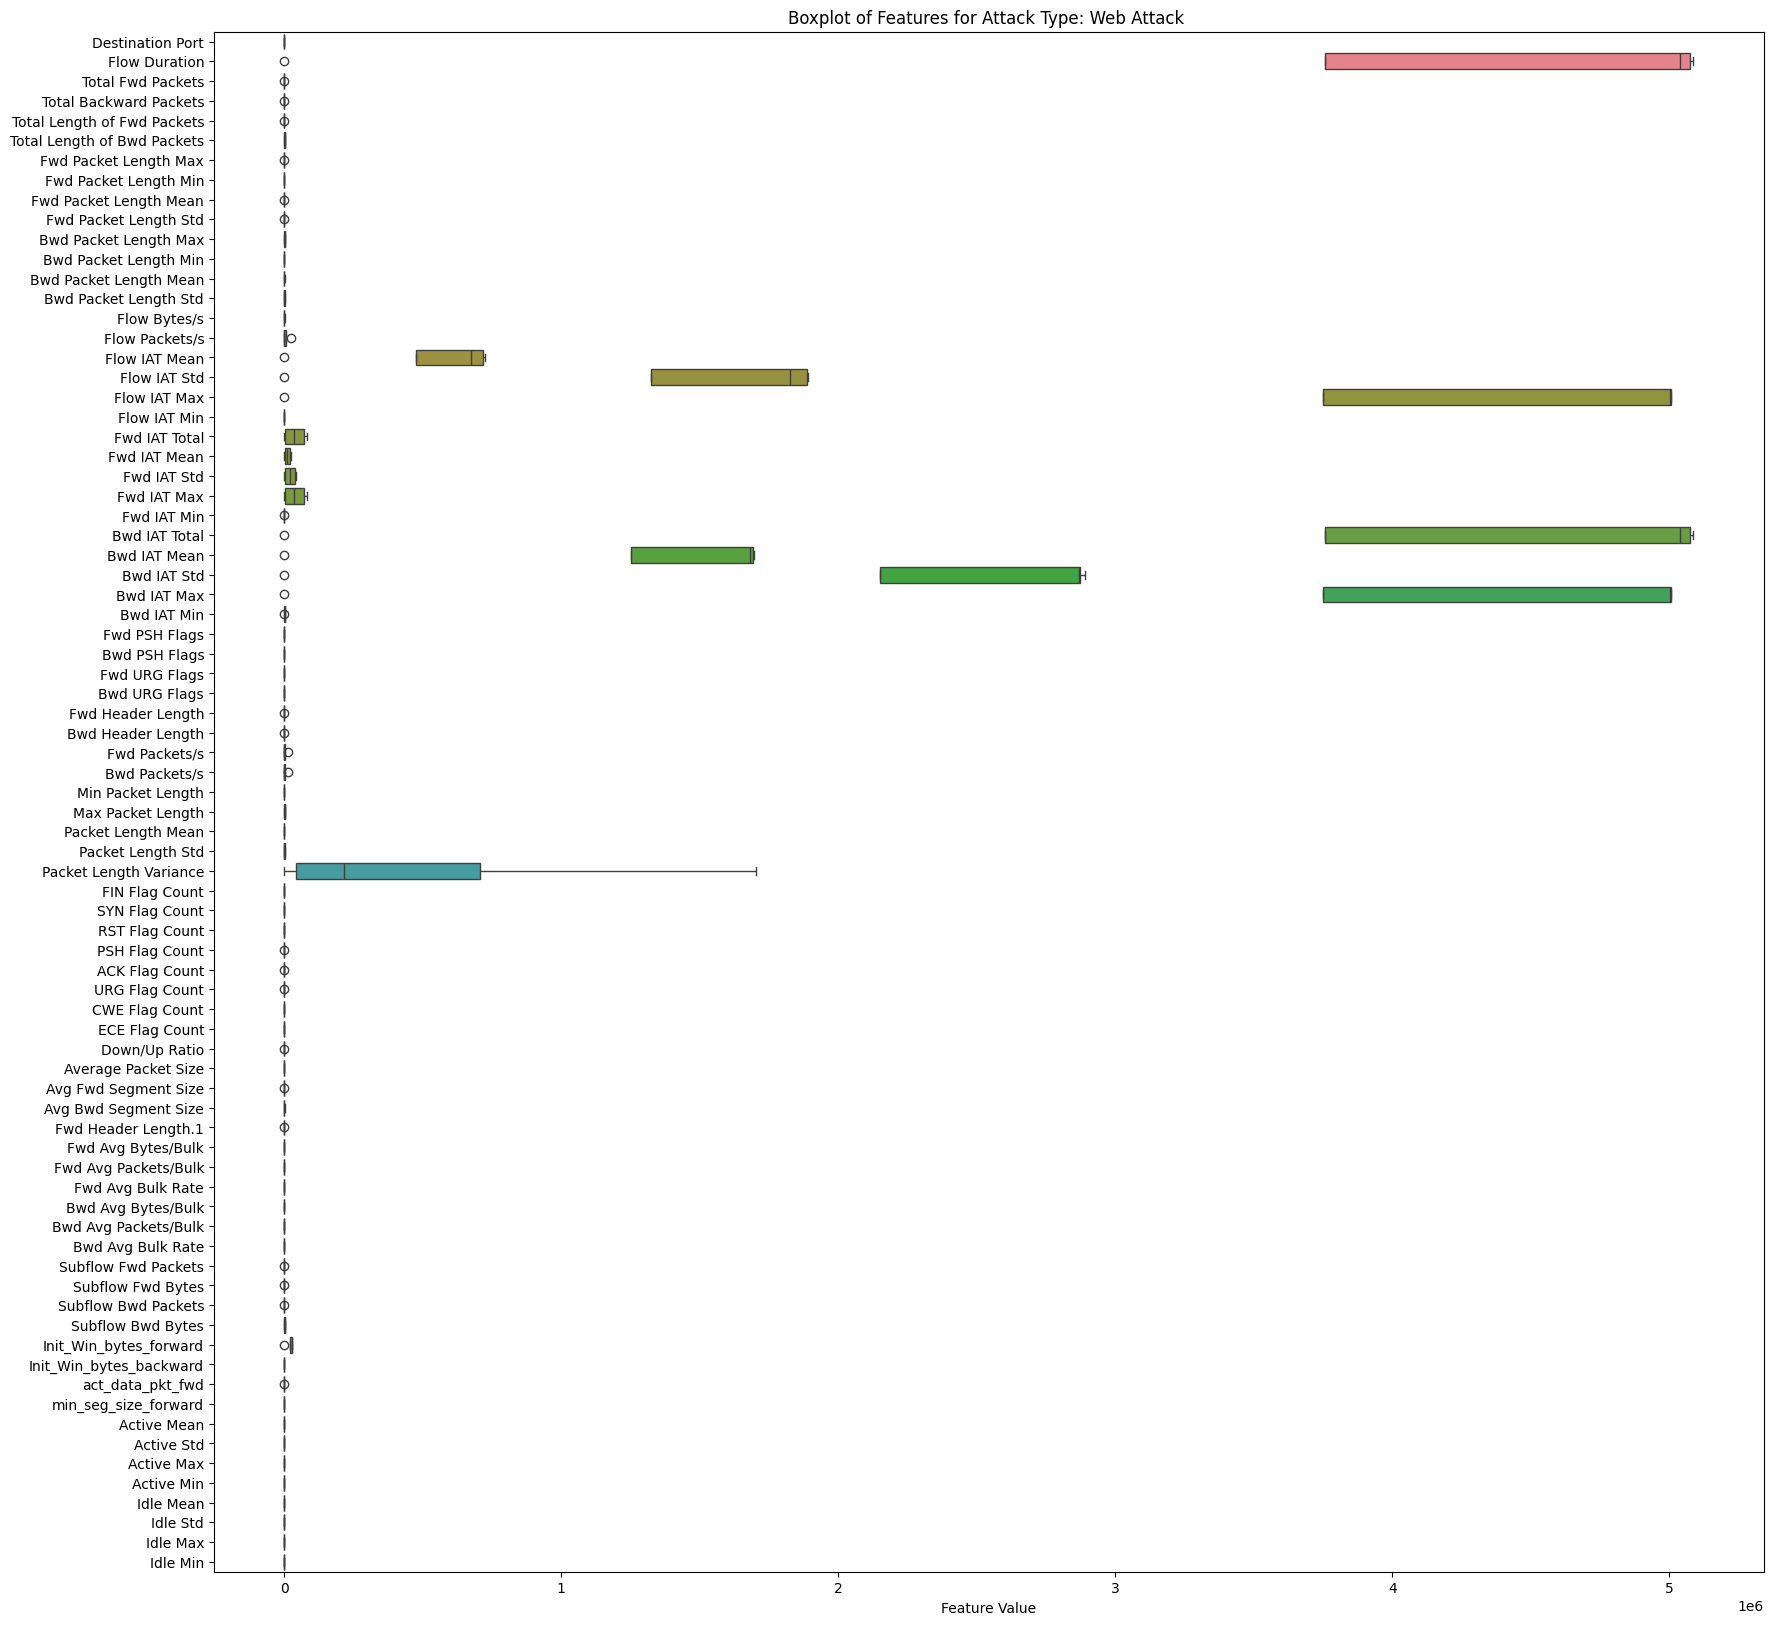

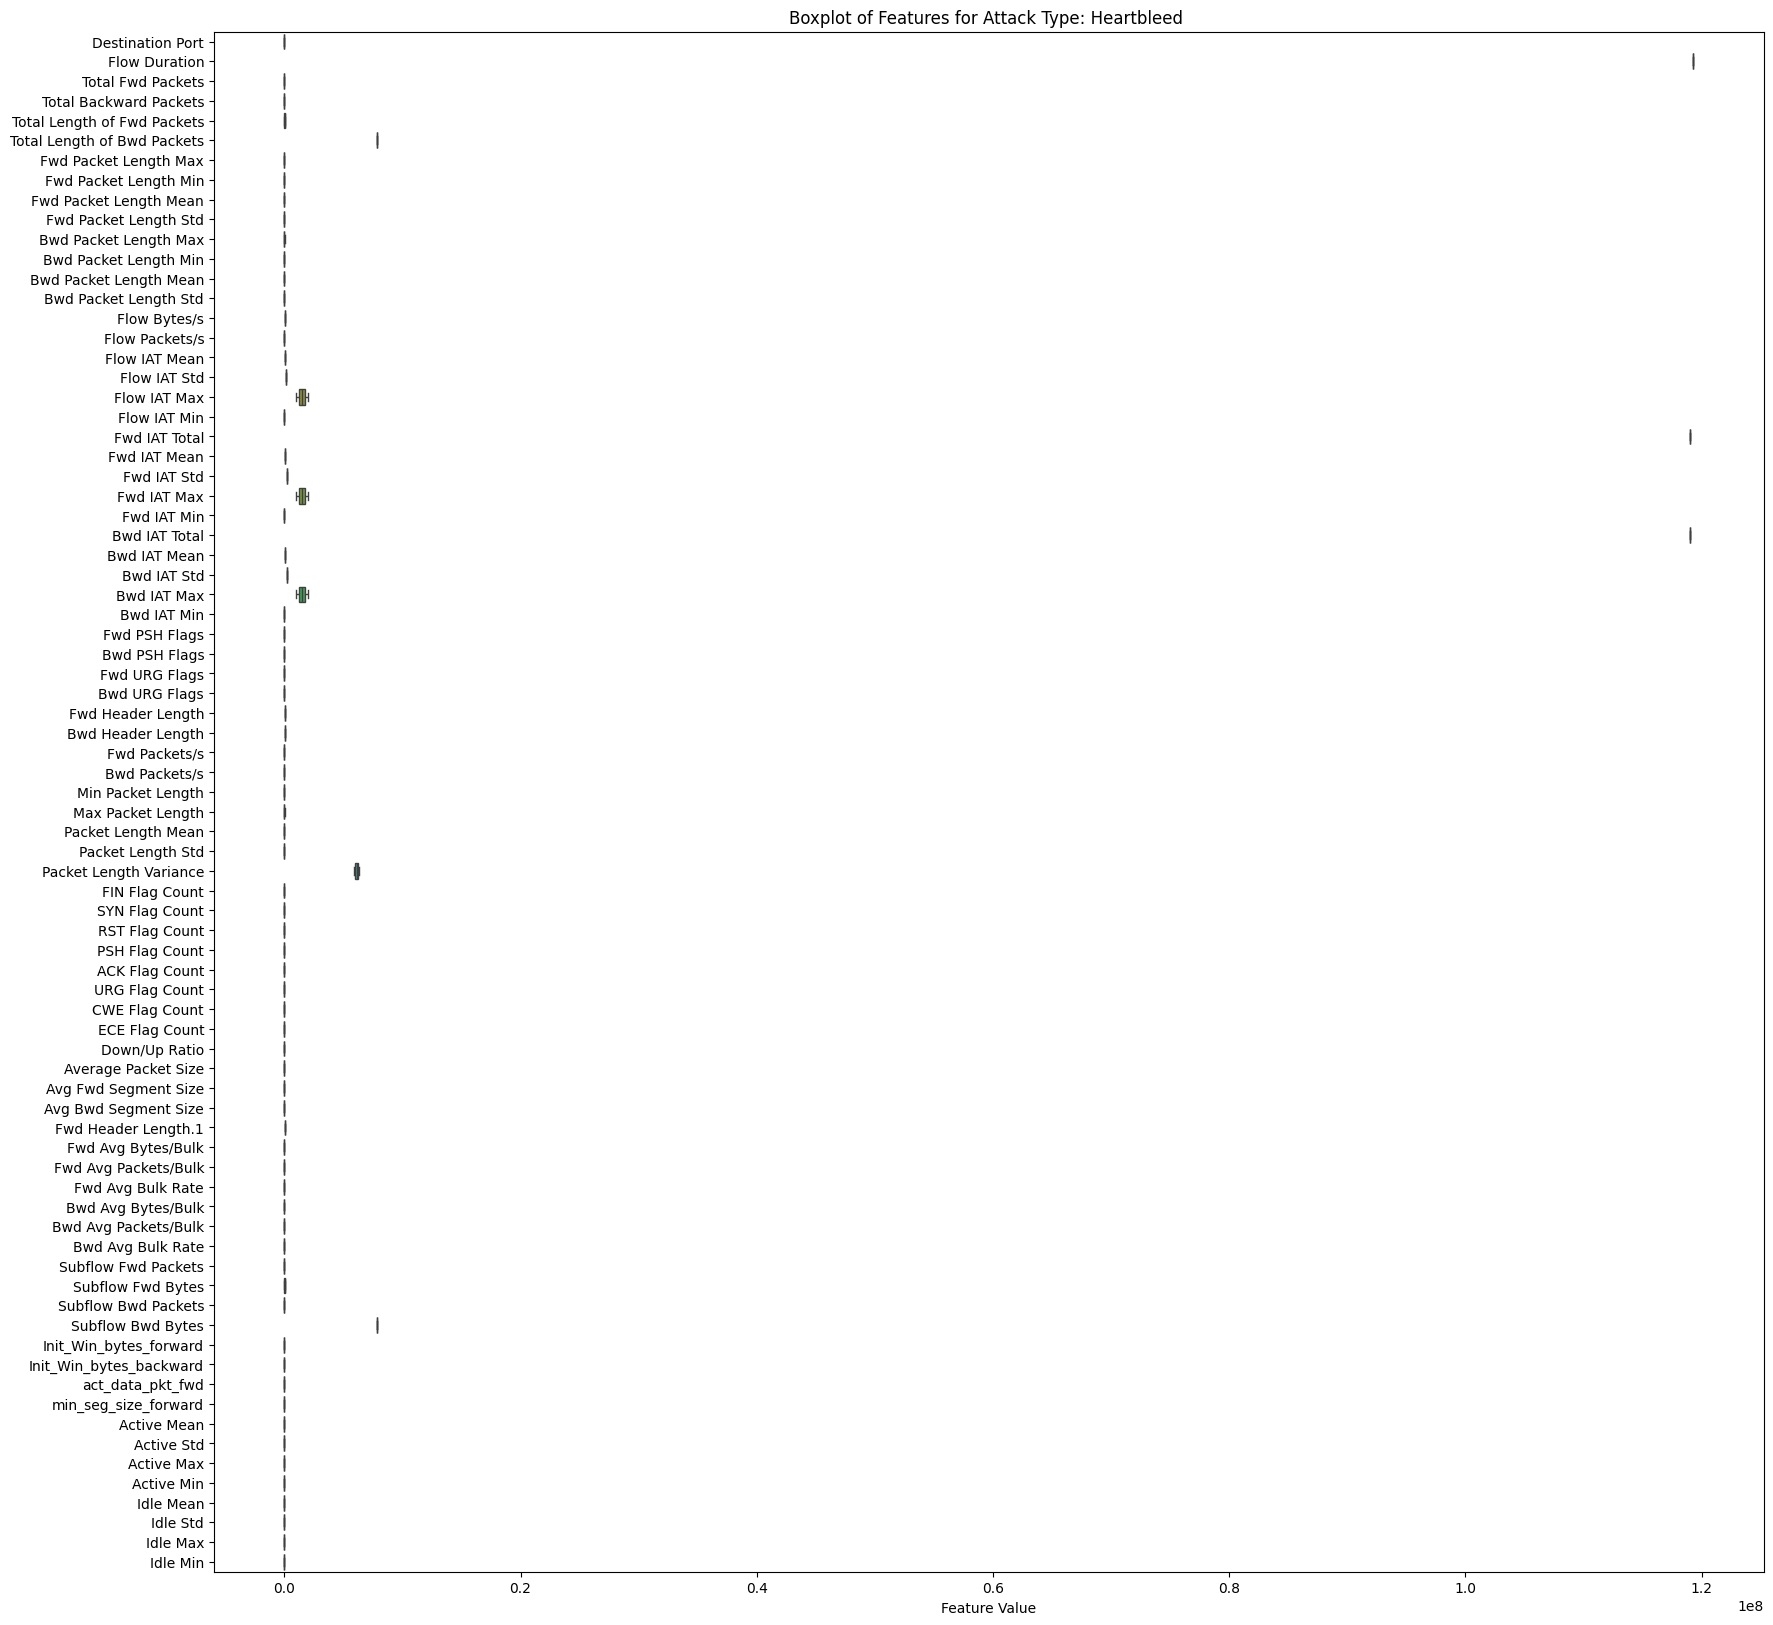